# MACHINE LEARNING INDIVIDUAL ASSIGNMENT

## Title : Prediction of Covid-19 Cases using Machine Learning

## Name : Shaidatul Addilla binti Khamis (17219414)

# DATA COLLECTION

## Data Source

Download Covid-19 data from [Humdata](https://data.humdata.org/dataset/novel-coronavirus-2019-ncov-cases)

## Set Directory

 Set directory for the downloaded dataset

In [796]:
import os
os.chdir("/Users/addilla/Desktop/project/dataset")
#os.getcwd()

## Import Libraries

In [914]:
import pandas as panda
import numpy as nampi
import matplotlib.pyplot as plotss
import seaborn as snss
import matplotlib.dates as mdates
from datetime import datetime

import sklearn
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
#from sklearn.model_selection import cross_val_score, cross_val_predict
#from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, r2_score

%matplotlib inline

## Initialize dataset

Initialize dataset for confirmed cases, recovered data and number of death for Covis-19 outbreak

In [797]:
confirmed_covidcases = panda.read_csv("time_series_covid19_confirmed_global.csv")
#recovered_covidcases = panda.read_csv("time_series_covid19_recovered_global.csv")
death_covidcases = panda.read_csv("time_series_covid19_deaths_global.csv")

In [798]:
confirmed_covidcases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,01/08/2021,01/09/2021,01/10/2021,01/11/2021,01/12/2021,1/13/21,1/14/21,1/15/21,1/16/21,1/17/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,53332,53400,53489,53538,53584,53584,53775,53831,53938,53984
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,62378,63033,63595,63971,64627,65334,65994,66635,67216,67690
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,101657,101913,102144,102369,102641,102860,103127,103381,103611,103833
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,8489,8586,8586,8586,8682,8818,8868,8946,9038,9083
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,18066,18156,18193,18254,18343,18425,18613,18679,18765,18875


In [799]:
#recovered_covidcases.head()

In [800]:
death_covidcases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,1/8/21,1/9/21,1/10/21,1/11/21,1/12/21,1/13/21,1/14/21,1/15/21,1/16/21,1/17/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,2257,2264,2277,2288,2301,2301,2314,2324,2336,2339
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,1230,1233,1241,1247,1252,1256,1261,1265,1270,1277
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,2798,2803,2807,2812,2816,2819,2822,2827,2831,2836
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,84,85,85,85,86,87,88,88,91,91
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,415,416,416,420,422,424,425,428,431,436


## Data Exploration

In [801]:
# the shape of the dataset

print(confirmed_covidcases.shape)
#print(recovered_covidcases.shape)
print(death_covidcases.shape)

(272, 366)
(272, 366)


 ### Desciption of data

In [802]:
confirmed_covidcases.describe().T

,count,mean,std,min,25%,50%,75%,max
Lat,271.0,20.688275,2.521517e+01,-51.7963,5.787974,21.9162,41.133100,7.170690e+01
Long,271.0,22.695528,7.342343e+01,-178.1165,-21.031300,20.9394,82.510898,1.780650e+02
1/22/20,272.0,2.047794,2.697753e+01,0.0000,0.000000,0.0000,0.000000,4.440000e+02
1/23/20,272.0,2.408088,2.707566e+01,0.0000,0.000000,0.0000,0.000000,4.440000e+02
1/24/20,272.0,3.459559,3.370764e+01,0.0000,0.000000,0.0000,0.000000,5.490000e+02
...,...,...,...,...,...,...,...,...
1/13/21,272.0,339541.411765,1.668603e+06,0.0000,840.500000,9970.5000,144885.000000,2.307896e+07
1/14/21,272.0,342317.970588,1.683181e+06,0.0000,854.000000,10153.5000,146751.000000,2.331452e+07
1/15/21,272.0,345133.110294,1.698137e+06,0.0000,855.750000,10604.0000,147152.000000,2.355610e+07
1/16/21,272.0,347409.569853,1.710619e+06,0.0000,859.250000,10765.5000,148416.500000,2.375886e+07


In [803]:
#recovered_covidcases.describe().T

In [804]:
death_covidcases.describe().T

,count,mean,std,min,25%,50%,75%,max
Lat,271.0,20.688275,25.215172,-51.7963,5.787974,21.9162,41.133100,71.7069
Long,271.0,22.695528,73.423431,-178.1165,-21.031300,20.9394,82.510898,178.0650
1/22/20,272.0,0.062500,1.030776,0.0000,0.000000,0.0000,0.000000,17.0000
1/23/20,272.0,0.066176,1.032335,0.0000,0.000000,0.0000,0.000000,17.0000
1/24/20,272.0,0.095588,1.457282,0.0000,0.000000,0.0000,0.000000,24.0000
...,...,...,...,...,...,...,...,...
1/13/21,272.0,7274.783088,31024.991275,0.0000,6.000000,133.0000,2304.250000,384768.0000
1/14/21,272.0,7331.080882,31282.376226,0.0000,6.000000,135.0000,2322.000000,388697.0000
1/15/21,272.0,7386.367647,31536.424750,0.0000,6.000000,138.0000,2337.000000,392499.0000
1/16/21,272.0,7434.283088,31763.851145,0.0000,6.000000,139.0000,2355.500000,395851.0000


# DATA PREPARATION

## Data cleaning

### Fixing region name

In [805]:
# Fixing region names
confirmed_covidcases['Country/Region']= confirmed_covidcases['Country/Region'].str.replace("Mainland China", "China")
confirmed_covidcases['Country/Region']= confirmed_covidcases['Country/Region'].str.replace("US", "Unites States")

death_covidcases['Country/Region']= death_covidcases['Country/Region'].str.replace("Mainland China", "China")
death_covidcases['Country/Region']= death_covidcases['Country/Region'].str.replace("US", "Unites States")

#recovered_covidcases['Country/Region']= recovered_covidcases['Country/Region'].str.replace("Mainland China", "China")
#recovered_covidcases['Country/Region']= recovered_covidcases['Country/Region'].str.replace("US", "Unites States")

### Drop unnecessary columns

In [806]:
#Drop columns 'Province/State','Lat' and 'Long'
confirmed_covidcases = confirmed_covidcases.drop(['Province/State','Lat', 'Long'], axis=1)
#recovered_covidcases = recovered_covidcases.drop(['Province/State','Lat', 'Long'], axis=1)
death_covidcases = death_covidcases.drop(['Province/State','Lat', 'Long'], axis=1)

### Rename column

In [807]:
#Rename columns
confirmed_covidcases = confirmed_covidcases.rename(columns = {'Country/Region': 'Country'}, inplace = False)
#recovered_covidcases = recovered_covidcases.rename(columns = {'Country/Region': 'Country'}, inplace = False)
death_covidcases = death_covidcases.rename(columns = {'Country/Region': 'Country'}, inplace = False)

### Missing values

In [1078]:
print(confirmed_covidcases.isnull().sum())
print(death_covidcases.isnull().sum())

Country    0
1/22/20    0
1/23/20    0
1/24/20    0
1/25/20    0
          ..
1/13/21    0
1/14/21    0
1/15/21    0
1/16/21    0
1/17/21    0
Length: 363, dtype: int64
Country    0
1/22/20    0
1/23/20    0
1/24/20    0
1/25/20    0
          ..
1/13/21    0
1/14/21    0
1/15/21    0
1/16/21    0
1/17/21    0
Length: 363, dtype: int64


### Calculate cumulative number of covid-19 cases

In [808]:
#count total confirm cases

confirmed_c = confirmed_covidcases.groupby(['Country']).sum()
confirmed_c = confirmed_c.T
confirmed_c = confirmed_c.reset_index()
confirmed_c = confirmed_c.rename(columns = {'index': 'Date'}, inplace = False)

#calculate worldwide confirmed cases
confirmed_c["Worldwide"] = confirmed_c.sum(axis=1)
confirmed_c

Country,Date,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe,Worldwide
0,1/22/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,557
1,1/23/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,655
2,1/24/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,941
3,1/25/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,1433
4,1/26/20,0,0,0,0,0,0,0,0,4,...,0,0,0,0,2,0,0,0,0,2118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,1/13/21,53584,65334,102860,8818,18425,176,1757429,163128,28660,...,28475,77716,1,117811,1521,149769,2109,31100,24256,92355264
358,1/14/21,53775,65994,103127,8868,18613,184,1770715,163576,28669,...,29989,77777,1,118415,1531,150505,2110,32800,25368,93110488
359,1/15/21,53831,66635,103381,8946,18679,184,1783047,163972,28689,...,30946,77904,1,118856,1536,151142,2111,34278,26109,93876206
360,1/16/21,53938,67216,103611,9038,18765,187,1791979,164235,28708,...,31669,77968,1,119306,1537,151569,2112,36074,26881,94495403


In [809]:
#count total recover cases

#recovered_c = recovered_covidcases.groupby(['Country']).sum()
#recovered_c = recovered_c.T
#recovered_c = recovered_c.reset_index()
#recovered_c = recovered_c.rename(columns = {'index': 'Date'}, inplace = False)

#calculate worldwide recovered cases
#recovered_c["Worldwide"] = recovered_c.sum(axis=1)
#recovered_c

In [810]:
#count total death cases

death_c = death_covidcases.groupby(['Country']).sum()
death_c = death_c.T
death_c = death_c.reset_index()
death_c = death_c.rename(columns = {'index': 'Date'}, inplace = False)

#calculate worldwide death cases
death_c["Worldwide"] = death_c.sum(axis=1)
death_c

Country,Date,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe,Worldwide
0,1/22/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,17
1,1/23/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,18
2,1/24/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,26
3,1/25/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,42
4,1/26/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,1/13/21,2301,1256,2819,87,424,5,44983,2951,909,...,275,618,0,1084,35,1658,612,509,589,1978741
358,1/14/21,2314,1261,2822,88,425,6,45125,2963,909,...,280,618,0,1090,35,1665,612,514,636,1994054
359,1/15/21,2324,1265,2827,88,428,6,45227,2974,909,...,291,619,0,1095,35,1687,612,527,666,2009092
360,1/16/21,2336,1270,2831,91,431,6,45295,2987,909,...,298,619,0,1101,35,1700,612,537,683,2022125


### Combine Worldwide Covid-19 data

In [811]:
total = panda.DataFrame(confirmed_c["Date"])

#combine worldwide  data
total['Cumulative Confirmed Cases'] = confirmed_c["Worldwide"]
#total['Cumulative Recovered Cases'] = recovered_c["Worldwide"]
total['Cumulative Death Cases'] = death_c["Worldwide"]

#calculate daily confirm cases
dff_c = total['Cumulative Confirmed Cases'].diff()
total['Daily Confirm Cases'] = dff_c
total.iloc[0, 3] = total.iloc[0, 1]

#calculate daily recover cases
#dff_r = total['Cumulative Recovered Cases'].diff()
#total['Daily Recover Cases'] = dff_r
#total.iloc[0, 5] = total.iloc[0, 2]

#calculate daily death cases
dff_r = total['Cumulative Death Cases'].diff()
total['Daily Death Cases'] = dff_r
total.iloc[0, 4] = total.iloc[0, 2]
total

,Date,Cumulative Confirmed Cases,Cumulative Death Cases,Daily Confirm Cases,Daily Death Cases
0,1/22/20,557,17,557.0,17.0
1,1/23/20,655,18,98.0,1.0
2,1/24/20,941,26,286.0,8.0
3,1/25/20,1433,42,492.0,16.0
4,1/26/20,2118,56,685.0,14.0
...,...,...,...,...,...
357,1/13/21,92355264,1978741,750197.0,16378.0
358,1/14/21,93110488,1994054,755224.0,15313.0
359,1/15/21,93876206,2009092,765718.0,15038.0
360,1/16/21,94495403,2022125,619197.0,13033.0


### Combine Malaysia Covid-19 data

In [812]:
malay = panda.DataFrame(confirmed_c["Date"])

#combine worldwide  data
malay['Cumulative Confirmed Cases'] = confirmed_c["Malaysia"]
#total['Cumulative Recovered Cases'] = recovered_c["Worldwide"]
malay['Cumulative Death Cases'] = death_c["Malaysia"]

#calculate daily confirm cases
dff_c = malay['Cumulative Confirmed Cases'].diff()
malay['Daily Confirm Cases'] = dff_c
malay.iloc[0, 3] = malay.iloc[0, 1]

#calculate daily recover cases
#dff_r = total['Cumulative Recovered Cases'].diff()
#total['Daily Recover Cases'] = dff_r
#total.iloc[0, 5] = total.iloc[0, 2]

#calculate daily death cases
dff_r = malay['Cumulative Death Cases'].diff()
malay['Daily Death Cases'] = dff_r
malay.iloc[0, 4] = malay.iloc[0, 2]
malay

,Date,Cumulative Confirmed Cases,Cumulative Death Cases,Daily Confirm Cases,Daily Death Cases
0,1/22/20,0,0,0.0,0.0
1,1/23/20,0,0,0.0,0.0
2,1/24/20,0,0,0.0,0.0
3,1/25/20,3,0,3.0,0.0
4,1/26/20,4,0,1.0,0.0
...,...,...,...,...,...
357,1/13/21,144518,563,2985.0,4.0
358,1/14/21,147855,578,3337.0,15.0
359,1/15/21,151066,586,3211.0,8.0
360,1/16/21,155095,594,4029.0,8.0


### Convert 'Date' to appropriate data type

In [813]:
total['Date'] = panda.to_datetime(total['Date'])
malay['Date'] = panda.to_datetime(malay['Date'])
malay.Date.head()

0   2020-01-22
1   2020-01-23
2   2020-01-24
3   2020-01-25
4   2020-01-26
Name: Date, dtype: datetime64[ns]

### Cumulative Covid-19 cases

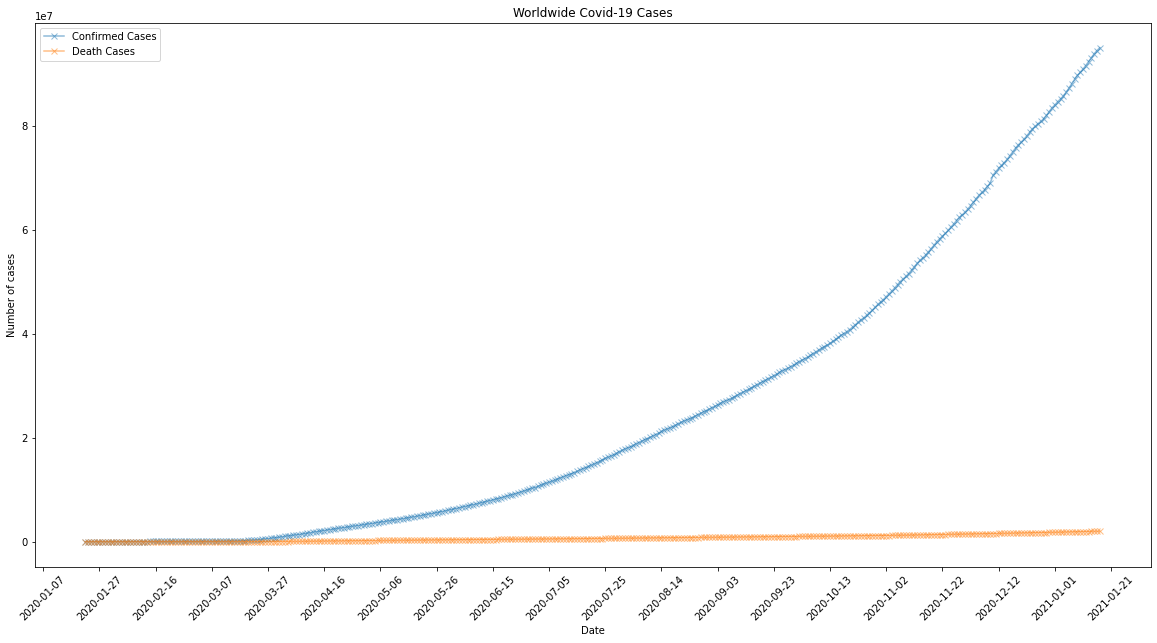

In [814]:
#cumulative worldwide covid-19 cases since January 2020

#initialize x-axis and y-axis
yaxis = total.iloc[:, 1:3]
xaxis = total.iloc[:, 0]

fig, ax = plotss.subplots(figsize=(20,10))
plotss.plot(xaxis, yaxis, marker='x',  alpha=0.5)
plotss.legend(['Confirmed Cases', 'Death Cases'], loc='upper left')
#plotss.rcParams['figure.figsize']=(30, 10)
plotss.title('Worldwide Covid-19 Cases')
plotss.xlabel('Date')
plotss.ylabel('Number of cases')
#fig, ax = plotss.subplots(figsize=(20,10))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=20))
plotss.xticks(rotation=45)
plotss.show()

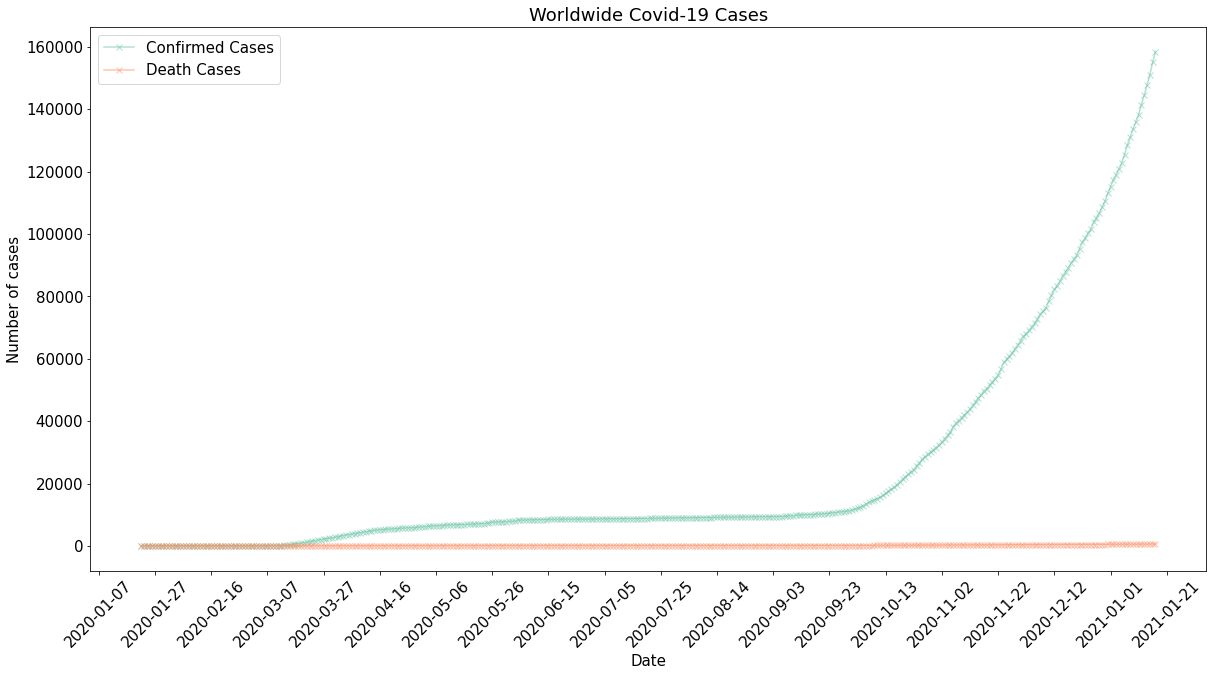

In [1107]:
#cumulative Malaysia covid-19 cases since January 2020

#initialize x-axis and y-axis
yaxis = malay.iloc[:, 1:3]
xaxis = malay.iloc[:, 0]

fig, ax = plotss.subplots(figsize=(20,10))
plotss.plot(xaxis, yaxis, marker='x',  alpha=0.5)
plotss.legend(['Confirmed Cases', 'Death Cases'], loc='upper left')
#plotss.rcParams['figure.figsize']=(30, 10)
plotss.title('Worldwide Covid-19 Cases')
plotss.xlabel('Date')
plotss.ylabel('Number of cases')
#fig, ax = plotss.subplots(figsize=(20,10))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=20))
plotss.xticks(rotation=45)
plotss.show()

### Daily Covid-19 cases

#### Worldwide

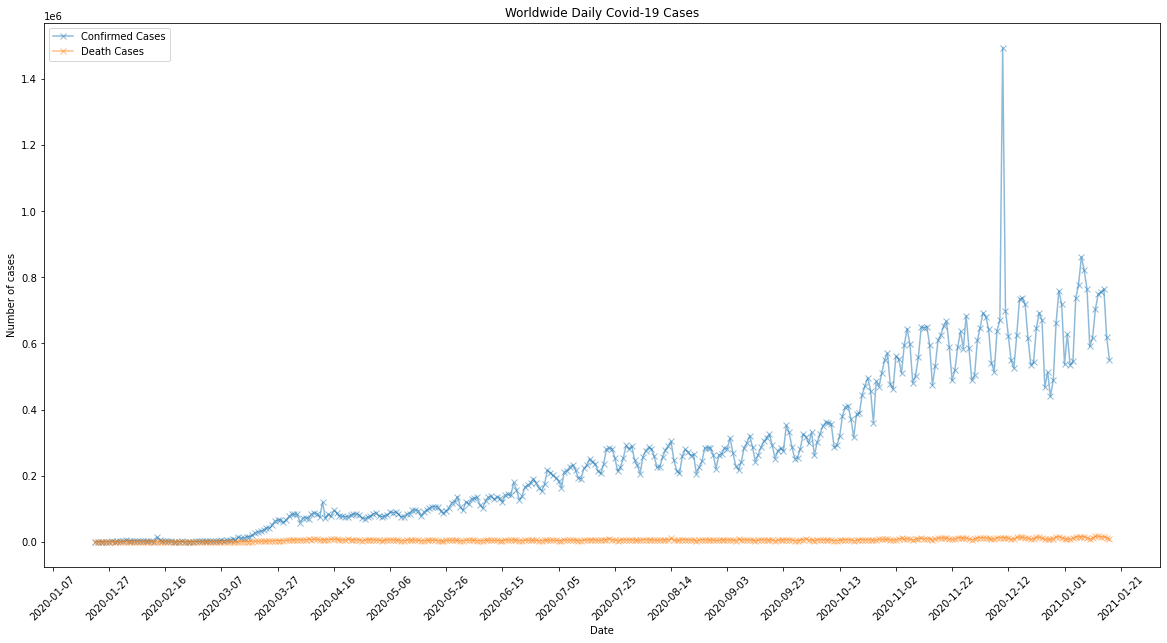

In [815]:
#daily covid-19 cases since January 2020

#initialize x-axis and y-axis
yaxis = total.iloc[:, 3:]
xaxis = total.iloc[:, 0]

fig, ax = plotss.subplots(figsize=(20,10))
plotss.plot(xaxis, yaxis, marker='x',  alpha=0.5)
plotss.legend(['Confirmed Cases', 'Death Cases'], loc='upper left')
#plotss.rcParams['figure.figsize']=(30, 10)
plotss.title('Worldwide Daily Covid-19 Cases')
plotss.xlabel('Date')
plotss.ylabel('Number of cases')
#fig, ax = plotss.subplots(figsize=(20,10))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=20))
plotss.xticks(rotation=45)
plotss.show()

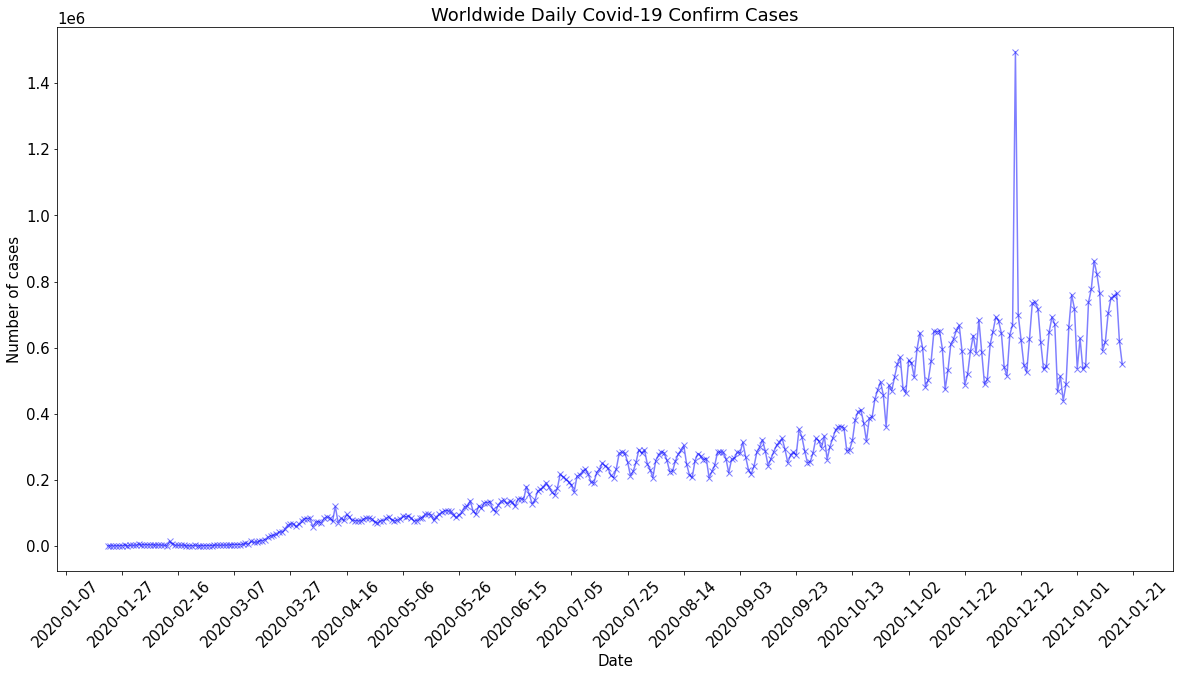

In [1097]:
#daily covid-19 cases since January 2020

#initialize x-axis and y-axis
yaxis = total.iloc[:, 3]
xaxis = total.iloc[:, 0]

fig, ax = plotss.subplots(figsize=(20,10))
plotss.plot(xaxis, yaxis, marker='x',  alpha=0.5, color='blue')
#plotss.legend(['Confirmed Cases', 'Death Cases'], loc='upper left')
#plotss.rcParams['figure.figsize']=(30, 10)
plotss.title('Worldwide Daily Covid-19 Confirm Cases')
plotss.xlabel('Date')
plotss.ylabel('Number of cases')
#fig, ax = plotss.subplots(figsize=(20,10))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=20))
plotss.xticks(rotation=45)
plotss.show()

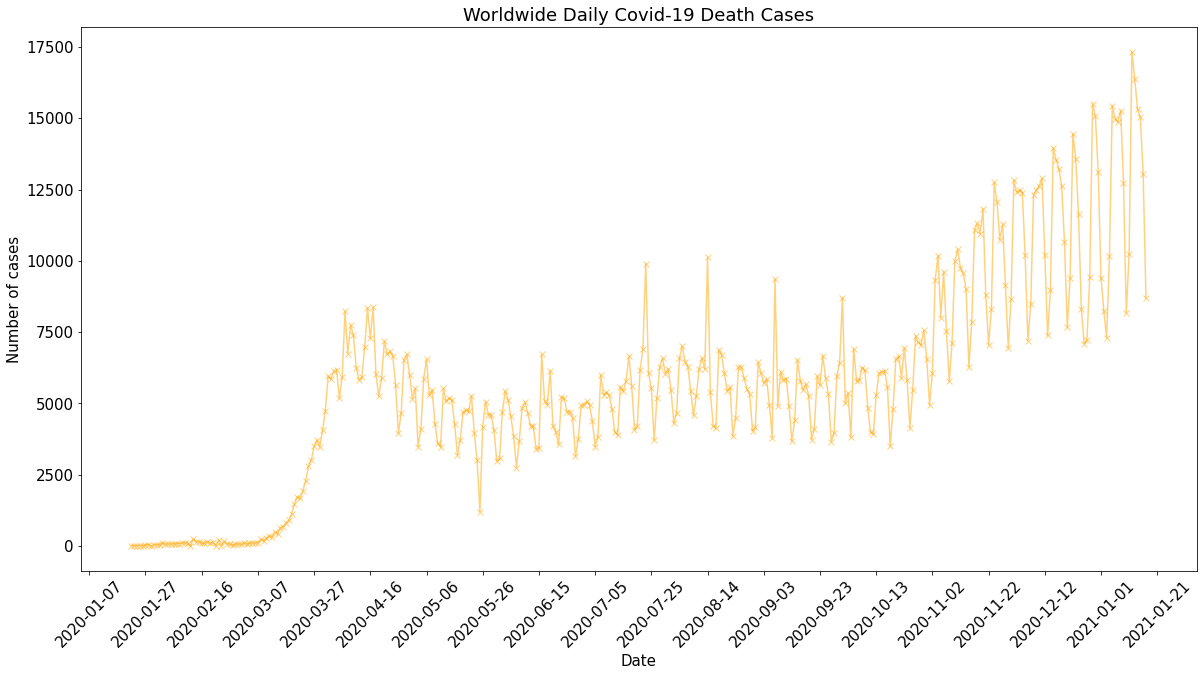

In [1098]:
#daily covid-19 cases since January 2020

#initialize x-axis and y-axis
yaxis = total.iloc[:, 4]
xaxis = total.iloc[:, 0]

fig, ax = plotss.subplots(figsize=(20,10))
plotss.plot(xaxis, yaxis, marker='x',  alpha=0.5, color='orange')
#plotss.legend(['Confirmed Cases', 'Death Cases'], loc='upper left')
#plotss.rcParams['figure.figsize']=(30, 10)
plotss.title('Worldwide Daily Covid-19 Death Cases')
plotss.xlabel('Date')
plotss.ylabel('Number of cases')
#fig, ax = plotss.subplots(figsize=(20,10))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=20))
plotss.xticks(rotation=45)
plotss.show()

In [1108]:
starts = '2020-02-01'
ends = '2020-03-31'

#filter worldwide timeline
filter_totals = total.loc[(total['Date'] > starts) & (total['Date'] <= ends)]


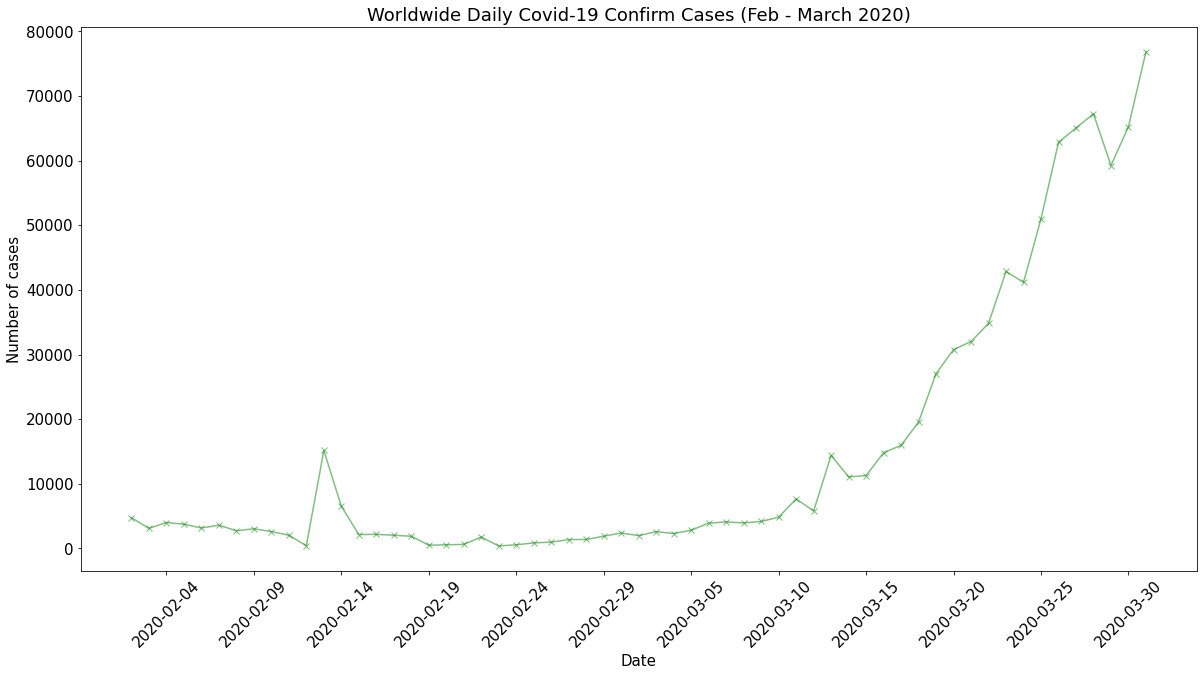

In [1105]:
#daily covid-19 confirm cases since January 2020 - March 2020

#initialize x-axis and y-axis
yaxis = filter_totals.iloc[:, 3]
xaxis = filter_totals.iloc[:, 0]

fig, ax = plotss.subplots(figsize=(20,10))
plotss.plot(xaxis, yaxis, marker='x',  alpha=0.5, color='green')
#plotss.legend(['Confirmed Cases', 'Death Cases'], loc='upper left')
#plotss.rcParams['figure.figsize']=(30, 10)
plotss.title('Worldwide Daily Covid-19 Confirm Cases (Feb - March 2020)')
plotss.xlabel('Date')
plotss.ylabel('Number of cases')
#fig, ax = plotss.subplots(figsize=(20,10))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))
plotss.xticks(rotation=45)
plotss.show()

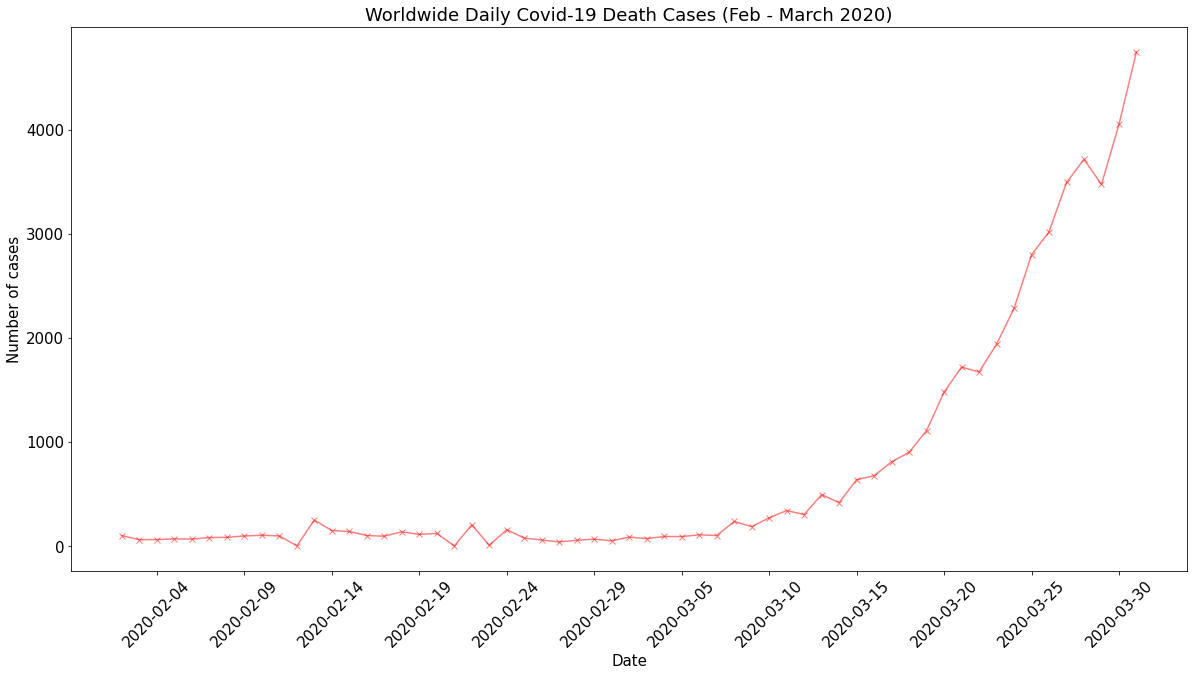

In [1106]:
#daily covid-19 death cases since January 2020 - March 2020

#initialize x-axis and y-axis
yaxis = filter_totals.iloc[:, 4]
xaxis = filter_totals.iloc[:, 0]

fig, ax = plotss.subplots(figsize=(20,10))
plotss.plot(xaxis, yaxis, marker='x',  alpha=0.5, color='red')
#plotss.legend(['Confirmed Cases', 'Death Cases'], loc='upper left')
#plotss.rcParams['figure.figsize']=(30, 10)
plotss.title('Worldwide Daily Covid-19 Death Cases (Feb - March 2020)')
plotss.xlabel('Date')
plotss.ylabel('Number of cases')
#fig, ax = plotss.subplots(figsize=(20,10))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))
plotss.xticks(rotation=45)
plotss.show()

#### Malaysia

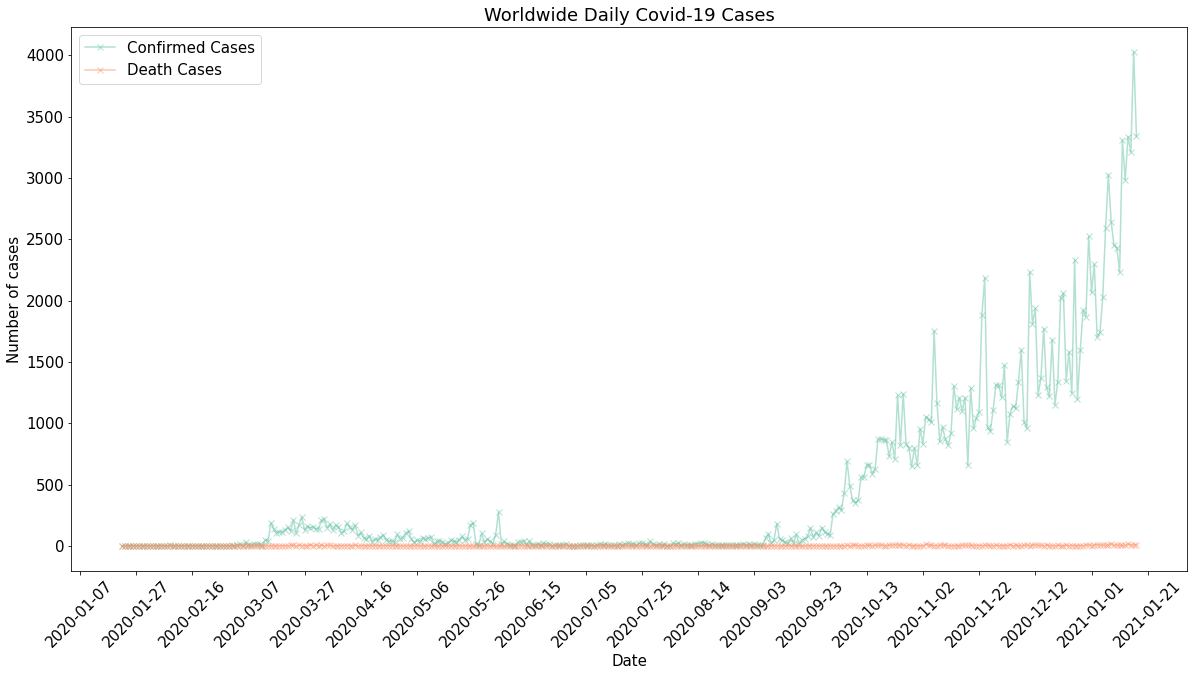

In [1109]:
#daily covid-19 cases since January 2020

#initialize x-axis and y-axis
yaxis = malay.iloc[:, 3:]
xaxis = malay.iloc[:, 0]

fig, ax = plotss.subplots(figsize=(20,10))
plotss.plot(xaxis, yaxis, marker='x',  alpha=0.5)
plotss.legend(['Confirmed Cases', 'Death Cases'], loc='upper left')
#plotss.rcParams['figure.figsize']=(30, 10)
plotss.title('Worldwide Daily Covid-19 Cases')
plotss.xlabel('Date')
plotss.ylabel('Number of cases')
#fig, ax = plotss.subplots(figsize=(20,10))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=20))
plotss.xticks(rotation=45)
plotss.show()

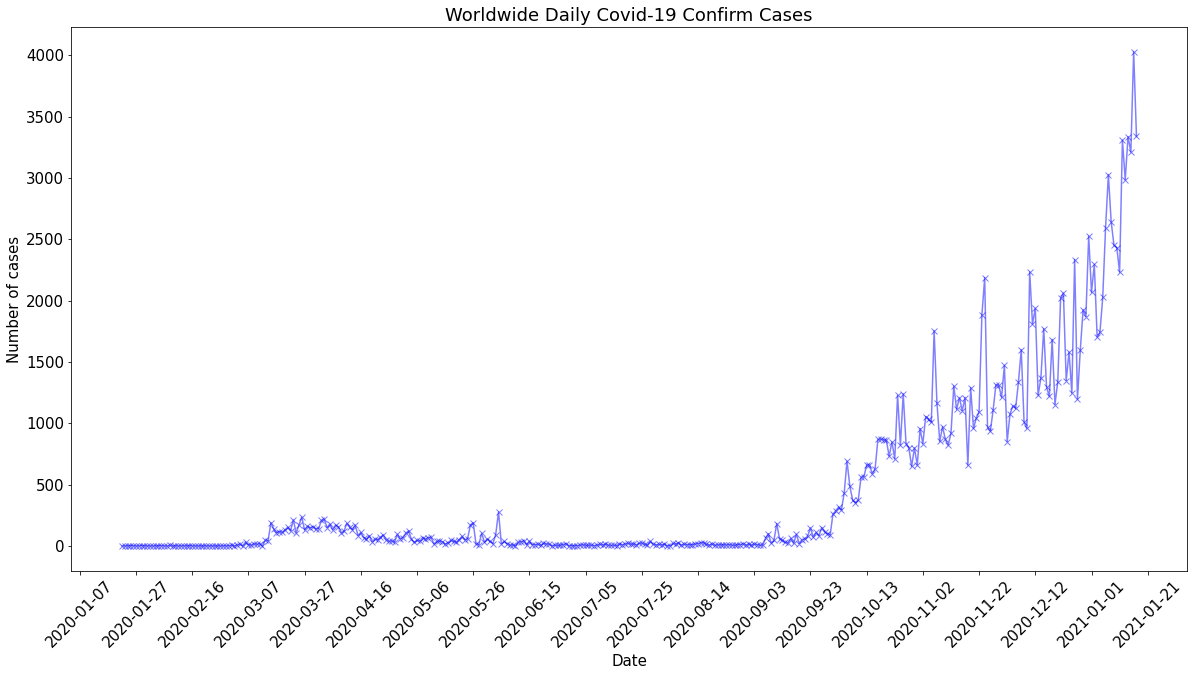

In [1110]:
#daily covid-19 cases since January 2020

#initialize x-axis and y-axis
yaxis = malay.iloc[:, 3]
xaxis = malay.iloc[:, 0]

fig, ax = plotss.subplots(figsize=(20,10))
plotss.plot(xaxis, yaxis, marker='x',  alpha=0.5, color='blue')
#plotss.legend(['Confirmed Cases', 'Death Cases'], loc='upper left')
#plotss.rcParams['figure.figsize']=(30, 10)
plotss.title('Worldwide Daily Covid-19 Confirm Cases')
plotss.xlabel('Date')
plotss.ylabel('Number of cases')
#fig, ax = plotss.subplots(figsize=(20,10))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=20))
plotss.xticks(rotation=45)
plotss.show()

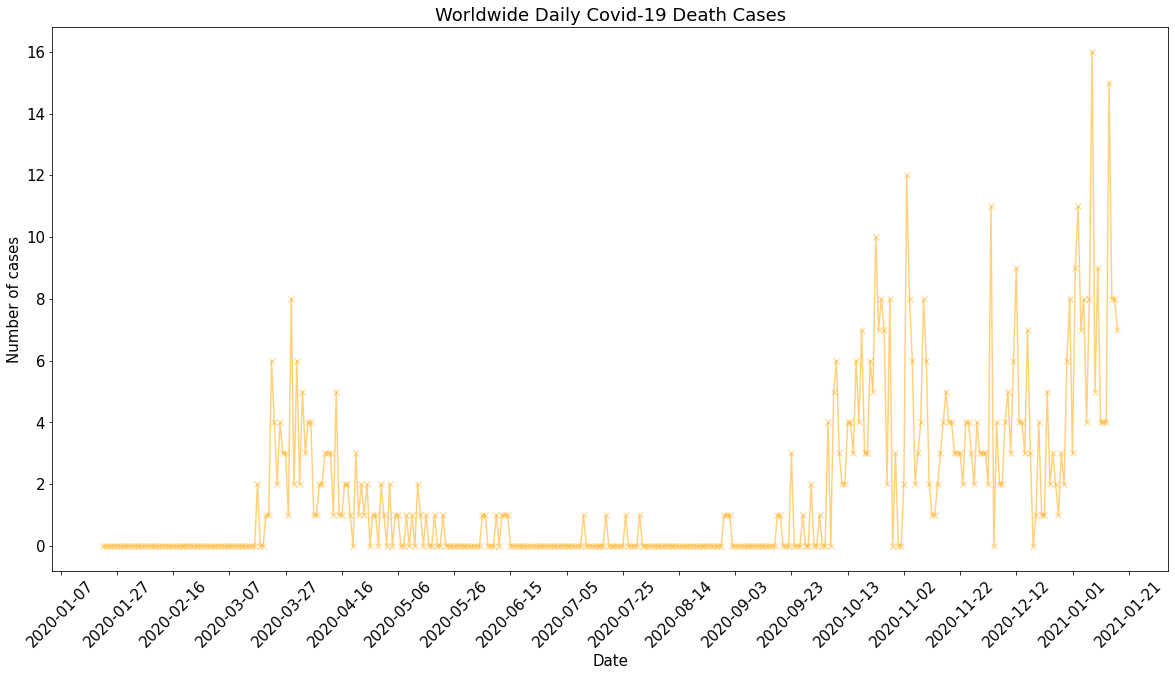

In [1111]:
#daily covid-19 cases since January 2020

#initialize x-axis and y-axis
yaxis = malay.iloc[:, 4]
xaxis = malay.iloc[:, 0]

fig, ax = plotss.subplots(figsize=(20,10))
plotss.plot(xaxis, yaxis, marker='x',  alpha=0.5, color='orange')
#plotss.legend(['Confirmed Cases', 'Death Cases'], loc='upper left')
#plotss.rcParams['figure.figsize']=(30, 10)
plotss.title('Worldwide Daily Covid-19 Death Cases')
plotss.xlabel('Date')
plotss.ylabel('Number of cases')
#fig, ax = plotss.subplots(figsize=(20,10))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=20))
plotss.xticks(rotation=45)
plotss.show()

In [1112]:
starts = '2020-02-01'
ends = '2020-03-31'

#filter worldwide timeline
filter_malays = malay.loc[(malay['Date'] > starts) & (malay['Date'] <= ends)]


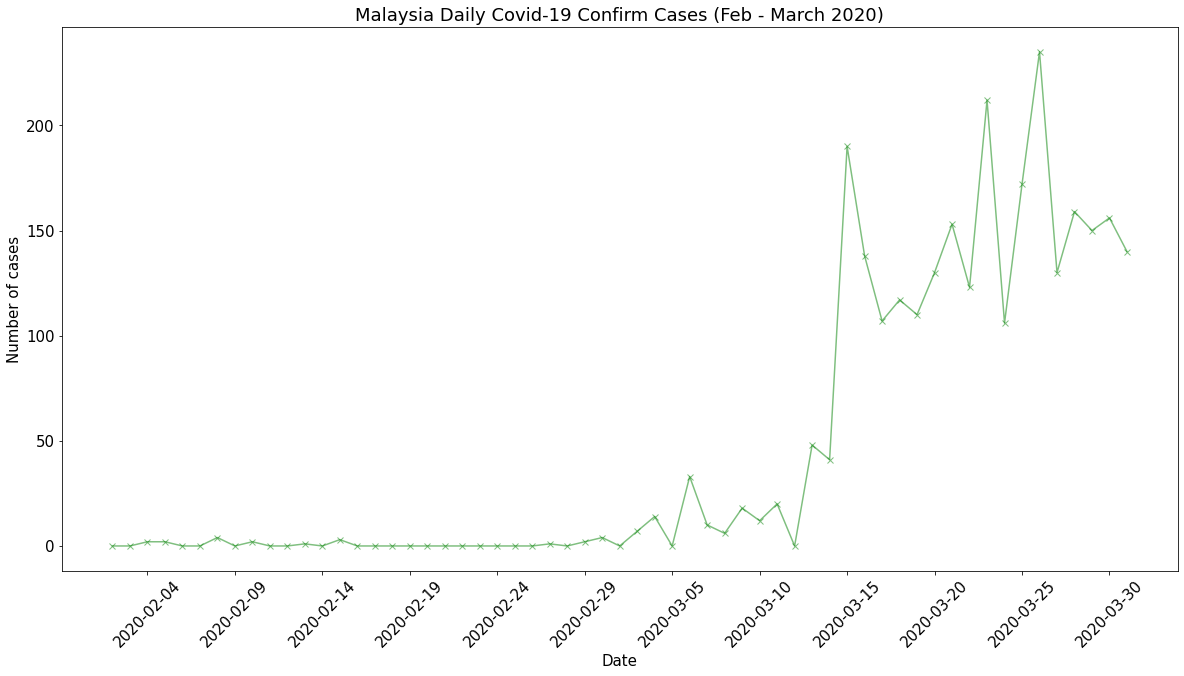

In [1115]:
#daily covid-19 confirm cases since January 2020 - March 2020

#initialize x-axis and y-axis
yaxis = filter_malays.iloc[:, 3]
xaxis = filter_malays.iloc[:, 0]

fig, ax = plotss.subplots(figsize=(20,10))
plotss.plot(xaxis, yaxis, marker='x',  alpha=0.5, color='green')
#plotss.legend(['Confirmed Cases', 'Death Cases'], loc='upper left')
#plotss.rcParams['figure.figsize']=(30, 10)
plotss.title('Malaysia Daily Covid-19 Confirm Cases (Feb - March 2020)')
plotss.xlabel('Date')
plotss.ylabel('Number of cases')
#fig, ax = plotss.subplots(figsize=(20,10))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))
plotss.xticks(rotation=45)
plotss.show()

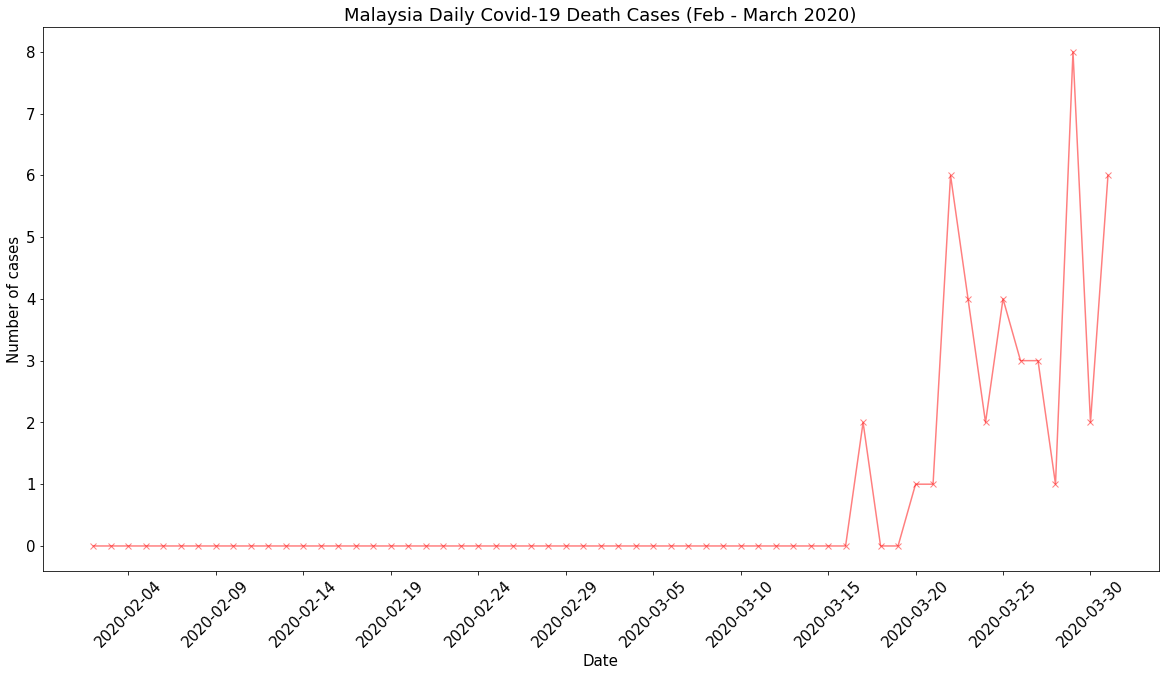

In [1116]:
#daily covid-19 death cases since January 2020 - March 2020

#initialize x-axis and y-axis
yaxis = filter_malays.iloc[:, 4]
xaxis = filter_malays.iloc[:, 0]

fig, ax = plotss.subplots(figsize=(20,10))
plotss.plot(xaxis, yaxis, marker='x',  alpha=0.5, color='red')
#plotss.legend(['Confirmed Cases', 'Death Cases'], loc='upper left')
#plotss.rcParams['figure.figsize']=(30, 10)
plotss.title('Malaysia Daily Covid-19 Death Cases (Feb - March 2020)')
plotss.xlabel('Date')
plotss.ylabel('Number of cases')
#fig, ax = plotss.subplots(figsize=(20,10))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))
plotss.xticks(rotation=45)
plotss.show()

## Data Selection

In [816]:
#start and end time

start = '2020-09-17'
end = '2021-01-17'
#start_time = panda.to_datetime(start)
#end_time = panda.to_datetime(end)

### Worldwide

In [1117]:
#filter worldwide timeline
filter_total = total.loc[(total['Date'] > start) & (total['Date'] <= end)]

filter_total.head()

,Date,Cumulative Confirmed Cases,Cumulative Death Cases,Daily Confirm Cases,Daily Death Cases
240,2020-09-18,30538199,952614,325809.0,5686.0
241,2020-09-19,30830382,957873,292183.0,5259.0
242,2020-09-20,31082470,961599,252088.0,3726.0
243,2020-09-21,31358356,965701,275886.0,4102.0
244,2020-09-22,31642566,971662,284210.0,5961.0


In [1118]:
#calculate no of days
confirm_d = nampi.array(filter_total['Daily Confirm Cases'])
days = []

for k in range(row):
     days.append(k+1)

#store array in dataframe
filter_total["No. of days"] = days

#rearrange column
filter_total = filter_total[["Date", "No. of days", "Cumulative Confirmed Cases", "Cumulative Death Cases", "Daily Confirm Cases", "Daily Death Cases"]]
filter_total

<ipython-input-1118-a588fe55d566>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter_total["No. of days"] = days


,Date,No. of days,Cumulative Confirmed Cases,Cumulative Death Cases,Daily Confirm Cases,Daily Death Cases
240,2020-09-18,1,30538199,952614,325809.0,5686.0
241,2020-09-19,2,30830382,957873,292183.0,5259.0
242,2020-09-20,3,31082470,961599,252088.0,3726.0
243,2020-09-21,4,31358356,965701,275886.0,4102.0
244,2020-09-22,5,31642566,971662,284210.0,5961.0
...,...,...,...,...,...,...
357,2021-01-13,118,92355264,1978741,750197.0,16378.0
358,2021-01-14,119,93110488,1994054,755224.0,15313.0
359,2021-01-15,120,93876206,2009092,765718.0,15038.0
360,2021-01-16,121,94495403,2022125,619197.0,13033.0


In [819]:
filter_total.describe()

,No. of days,Cumulative Confirmed Cases,Cumulative Death Cases,Daily Confirm Cases,Daily Death Cases
count,122.000000,1.220000e+02,1.220000e+02,1.220000e+02,122.000000
mean,61.500000,5.830336e+07,1.400228e+06,5.314200e+05,8884.450820
std,35.362409,1.961706e+07,3.194293e+05,1.750481e+05,3408.367509
min,1.000000,3.053820e+07,9.526140e+05,2.518640e+05,3503.000000
25%,31.250000,4.015526e+07,1.115660e+06,3.874640e+05,6079.750000
50%,61.500000,5.607263e+07,1.344614e+06,5.384860e+05,8283.500000
75%,91.750000,7.554757e+07,1.671918e+06,6.442935e+05,11546.500000
max,122.000000,9.504563e+07,2.030831e+06,1.494985e+06,17330.000000


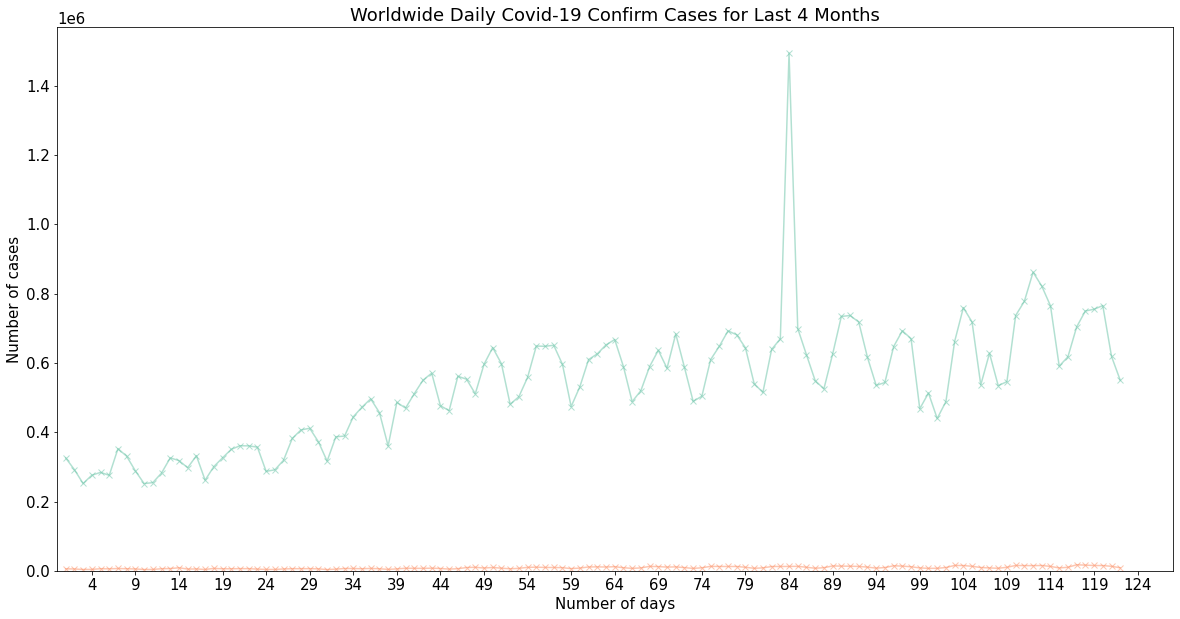

In [1121]:
#last 4 months Covid-19 daily confirm cases 

#initialize x-axis and y-axis
yaxis2 = filter_total.iloc[:, 4:]
xaxis2 = filter_total.iloc[:, 1]

fig, ax = plotss.subplots(figsize=(20,10))
plotss.plot(xaxis2, yaxis2, marker='x', alpha=0.5)
#plotss.legend(['Confirmed Cases', 'Death Cases'], loc='upper left')
#plotss.rcParams['figure.figsize']=(30, 10)
plotss.title('Worldwide Daily Covid-19 Confirm Cases for Last 4 Months')
plotss.xlabel('Number of days')
plotss.ylabel('Number of cases')
#fig, ax = plotss.subplots(figsize=(20,10))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))
#plotss.xticks(rotation=45)
ax.set_ylim(bottom=0)
ax.set_xlim(0)
plotss.show()


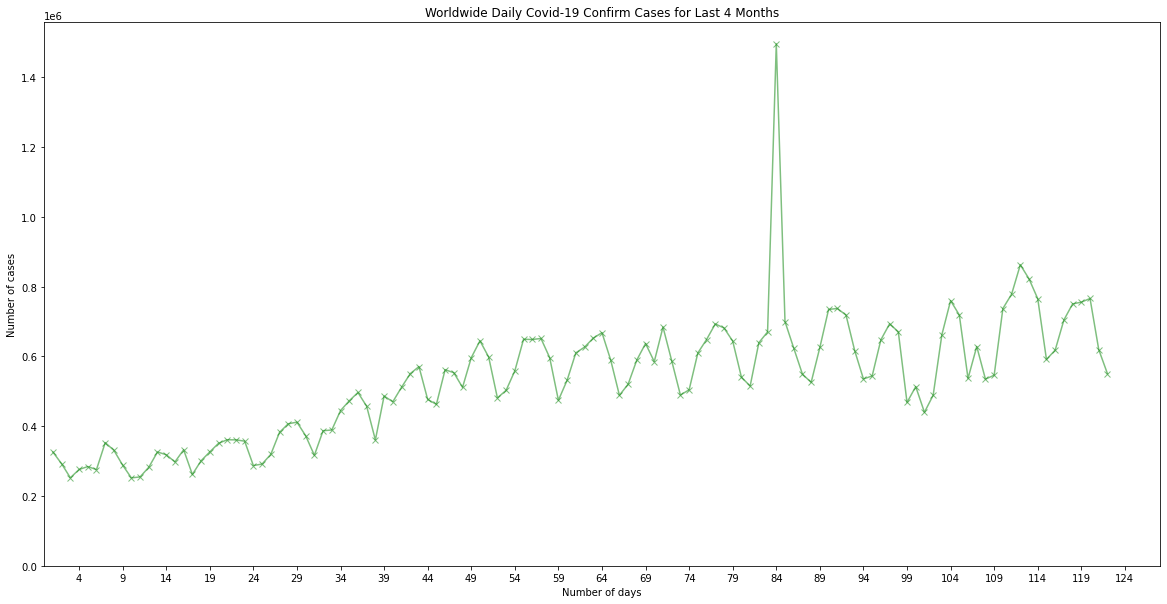

In [820]:
#last 4 months Covid-19 daily confirm cases 

#initialize x-axis and y-axis
yaxis2 = filter_total.iloc[:, 4]
xaxis2 = filter_total.iloc[:, 1]

fig, ax = plotss.subplots(figsize=(20,10))
plotss.plot(xaxis2, yaxis2, marker='x', alpha=0.5, color='green')
#plotss.legend(['Confirmed Cases', 'Death Cases'], loc='upper left')
#plotss.rcParams['figure.figsize']=(30, 10)
plotss.title('Worldwide Daily Covid-19 Confirm Cases for Last 4 Months')
plotss.xlabel('Number of days')
plotss.ylabel('Number of cases')
#fig, ax = plotss.subplots(figsize=(20,10))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))
#plotss.xticks(rotation=45)
ax.set_ylim(bottom=0)
ax.set_xlim(0)
plotss.show()


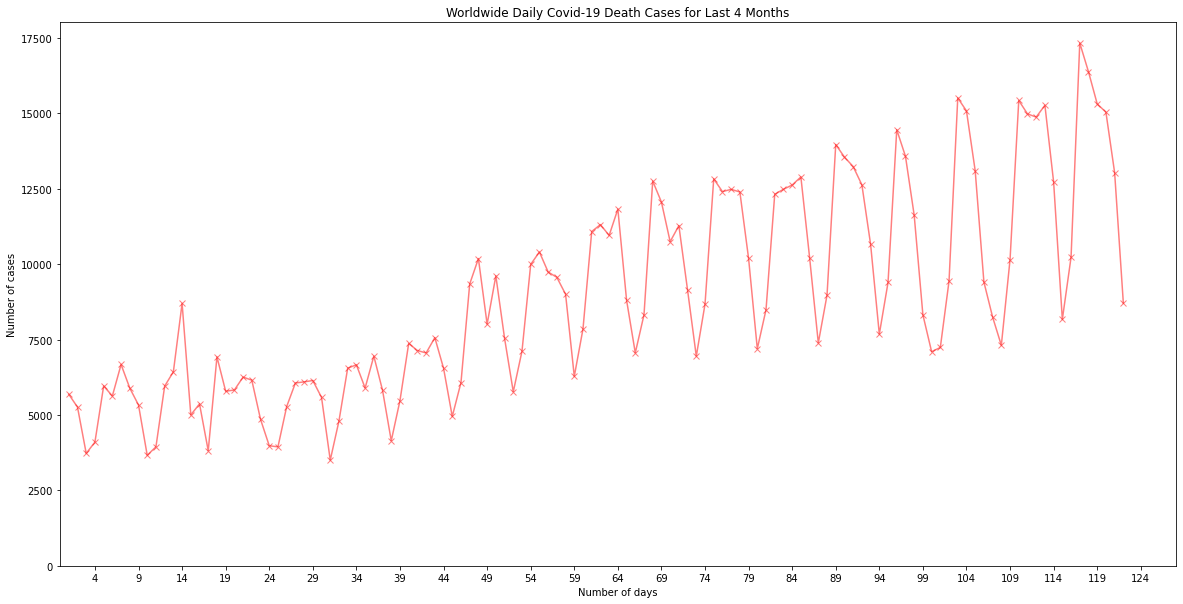

In [821]:
#last 4 months Covid-19 daily death cases 

#initialize x-axis and y-axis
yaxis2 = filter_total.iloc[:, 5]
xaxis2 = filter_total.iloc[:, 1]

fig, ax = plotss.subplots(figsize=(20,10))
plotss.plot(xaxis2, yaxis2, marker='x', alpha=0.5, color='red')
#plotss.legend(['Confirmed Cases', 'Death Cases'], loc='upper left')
#plotss.rcParams['figure.figsize']=(30, 10)
plotss.title('Worldwide Daily Covid-19 Death Cases for Last 4 Months')
plotss.xlabel('Number of days')
plotss.ylabel('Number of cases')
#fig, ax = plotss.subplots(figsize=(20,10))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))
#plotss.xticks(rotation=45)
ax.set_ylim(bottom=0)
ax.set_xlim(0)
plotss.show()


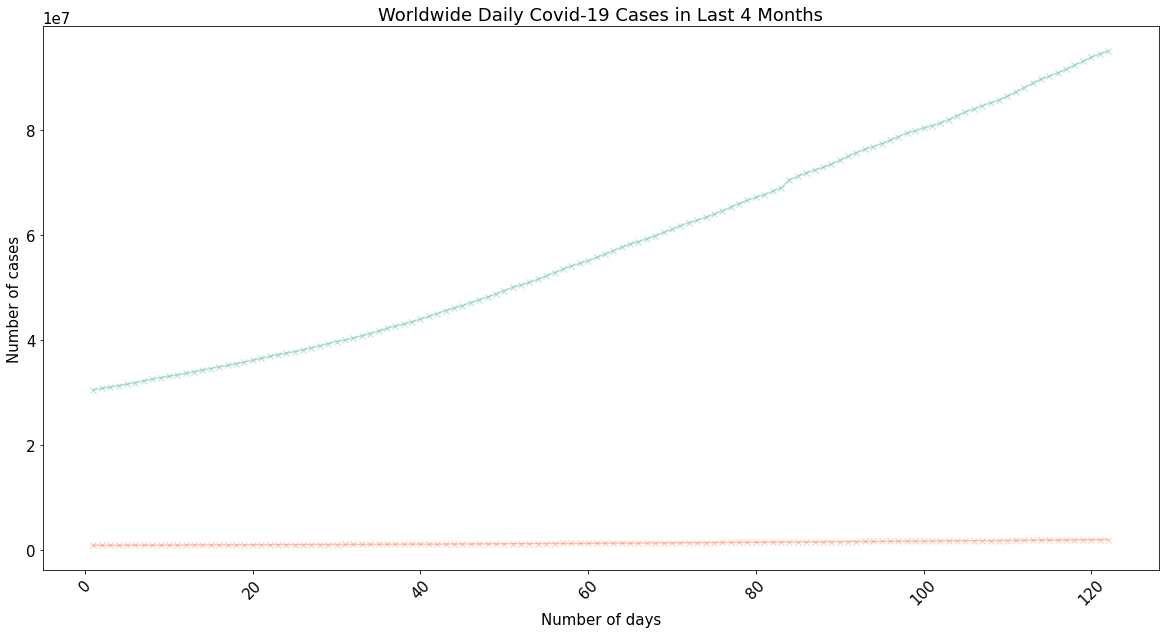

In [1122]:
#last 4 months wordlwide Covid-19 cases

#initialize x-axis and y-axis
yaxis3 = filter_total.iloc[:, 2:4]
xaxis3 = filter_total.iloc[:, 1]

fig, ax = plotss.subplots(figsize=(20,10))
plotss.plot(xaxis3, yaxis3, marker='x',  alpha=0.5)
#plotss.legend(['Confirmed Cases', 'Death Cases'], loc='upper left')
#plotss.rcParams['figure.figsize']=(30, 10)
plotss.title('Worldwide Daily Covid-19 Cases in Last 4 Months')
plotss.xlabel('Number of days')
plotss.ylabel('Number of cases')
#fig, ax = plotss.subplots(figsize=(20,10))
#ax.xaxis.setmajor_locator(mdates.DayLocator(interval=5))
plotss.xticks(rotation=45)
plotss.show()


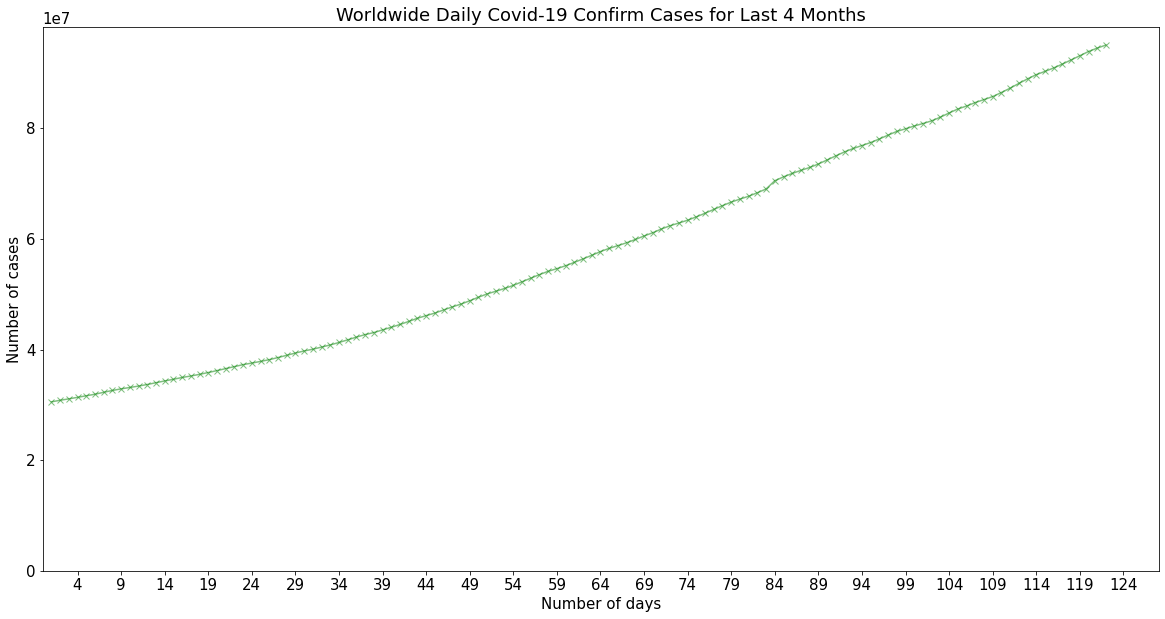

In [1123]:
#last 4 months Covid-19 daily confirm cases 

#initialize x-axis and y-axis
yaxis2 = filter_total.iloc[:, 2]
xaxis2 = filter_total.iloc[:, 1]

fig, ax = plotss.subplots(figsize=(20,10))
plotss.plot(xaxis2, yaxis2, marker='x', alpha=0.5, color='green')
#plotss.legend(['Confirmed Cases', 'Death Cases'], loc='upper left')
#plotss.rcParams['figure.figsize']=(30, 10)
plotss.title('Worldwide Daily Covid-19 Confirm Cases for Last 4 Months')
plotss.xlabel('Number of days')
plotss.ylabel('Number of cases')
#fig, ax = plotss.subplots(figsize=(20,10))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))
#plotss.xticks(rotation=45)
ax.set_ylim(bottom=0)
ax.set_xlim(0)
plotss.show()


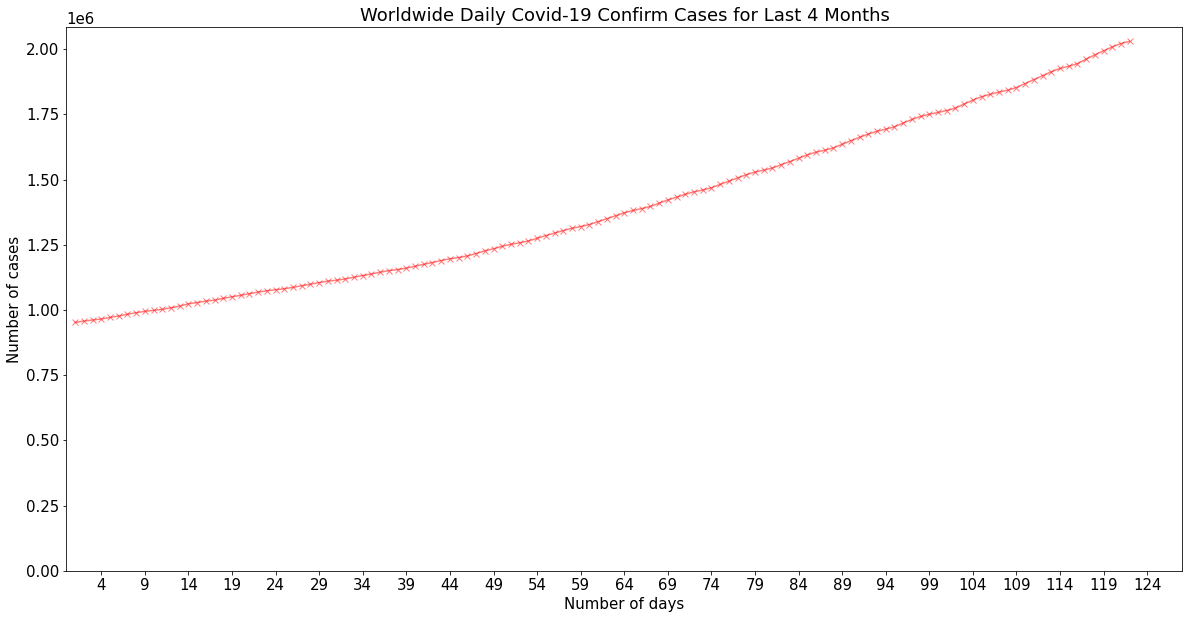

In [1124]:
#last 4 months Covid-19 daily confirm cases 

#initialize x-axis and y-axis
yaxis2 = filter_total.iloc[:, 3]
xaxis2 = filter_total.iloc[:, 1]

fig, ax = plotss.subplots(figsize=(20,10))
plotss.plot(xaxis2, yaxis2, marker='x', alpha=0.5, color='red')
#plotss.legend(['Confirmed Cases', 'Death Cases'], loc='upper left')
#plotss.rcParams['figure.figsize']=(30, 10)
plotss.title('Worldwide Daily Covid-19 Confirm Cases for Last 4 Months')
plotss.xlabel('Number of days')
plotss.ylabel('Number of cases')
#fig, ax = plotss.subplots(figsize=(20,10))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))
#plotss.xticks(rotation=45)
ax.set_ylim(bottom=0)
ax.set_xlim(0)
plotss.show()


### Malaysia

In [823]:
#filter malaysia timeline
filter_malay = malay.loc[(malay['Date'] > start) & (malay['Date'] <= end)]

filter_malay.head()

,Date,Cumulative Confirmed Cases,Cumulative Death Cases,Daily Confirm Cases,Daily Death Cases
240,2020-09-18,10147,129,95.0,1.0
241,2020-09-19,10167,130,20.0,1.0
242,2020-09-20,10219,130,52.0,0.0
243,2020-09-21,10276,130,57.0,0.0
244,2020-09-22,10358,130,82.0,0.0


In [824]:
#calculate no of days
confirm_d = nampi.array(filter_malay['Daily Confirm Cases'])
days = []

for k in range(row):
     days.append(k+1)

#store array in dataframe
filter_malay["No. of days"] = days

#rearrange column
filter_malay = filter_malay[["Date", "No. of days", "Cumulative Confirmed Cases", "Cumulative Death Cases", "Daily Confirm Cases", "Daily Death Cases"]]
filter_malay

<ipython-input-824-ab2a0e9482ef>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter_malay["No. of days"] = days


,Date,No. of days,Cumulative Confirmed Cases,Cumulative Death Cases,Daily Confirm Cases,Daily Death Cases
240,2020-09-18,1,10147,129,95.0,1.0
241,2020-09-19,2,10167,130,20.0,1.0
242,2020-09-20,3,10219,130,52.0,0.0
243,2020-09-21,4,10276,130,57.0,0.0
244,2020-09-22,5,10358,130,82.0,0.0
...,...,...,...,...,...,...
357,2021-01-13,118,144518,563,2985.0,4.0
358,2021-01-14,119,147855,578,3337.0,15.0
359,2021-01-15,120,151066,586,3211.0,8.0
360,2021-01-16,121,155095,594,4029.0,8.0


In [825]:
filter_malay.describe()

,No. of days,Cumulative Confirmed Cases,Cumulative Death Cases,Daily Confirm Cases,Daily Death Cases
count,122.000000,122.000000,122.000000,122.000000,122.000000
mean,61.500000,59274.434426,318.967213,1216.245902,3.877049
std,35.362409,42366.689675,137.546442,825.995871,3.189803
min,1.000000,10147.000000,129.000000,20.000000,0.000000
25%,31.250000,20714.250000,187.750000,667.750000,2.000000
50%,61.500000,50060.000000,320.000000,1085.500000,3.000000
75%,91.750000,90395.250000,432.000000,1662.250000,5.750000
max,122.000000,158434.000000,601.000000,4029.000000,16.000000


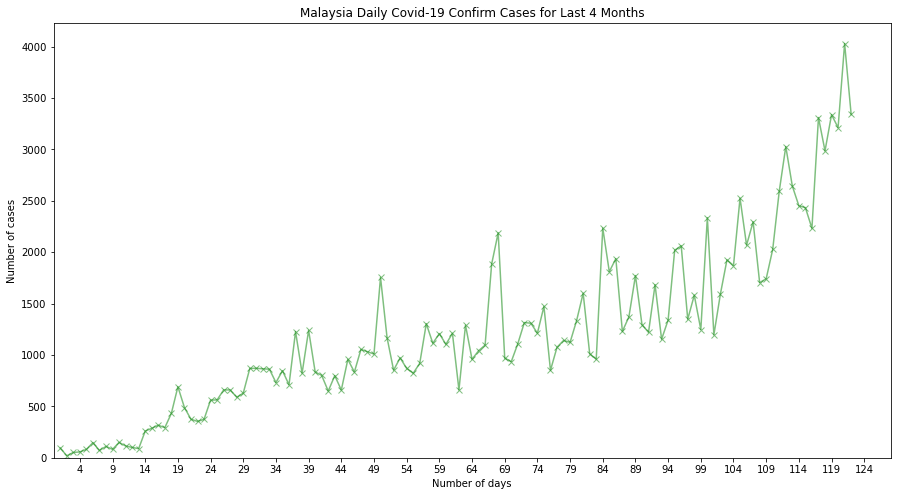

In [826]:
#last 4 months Covid-19 daily confirm cases 

#initialize x-axis and y-axis
yaxis22 = filter_malay.iloc[:, 4]
xaxis22 = filter_malay.iloc[:, 1]

fig, ax = plotss.subplots(figsize=(15,8))
plotss.plot(xaxis22, yaxis22, marker='x', alpha=0.5, color='green')
#plotss.legend(['Confirmed Cases', 'Death Cases'], loc='upper left')
#plotss.rcParams['figure.figsize']=(30, 10)
plotss.title('Malaysia Daily Covid-19 Confirm Cases for Last 4 Months')
plotss.xlabel('Number of days')
plotss.ylabel('Number of cases')
#fig, ax = plotss.subplots(figsize=(20,10))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))
#plotss.xticks(rotation=45)
ax.set_ylim(bottom=0)
ax.set_xlim(0)
plotss.show()

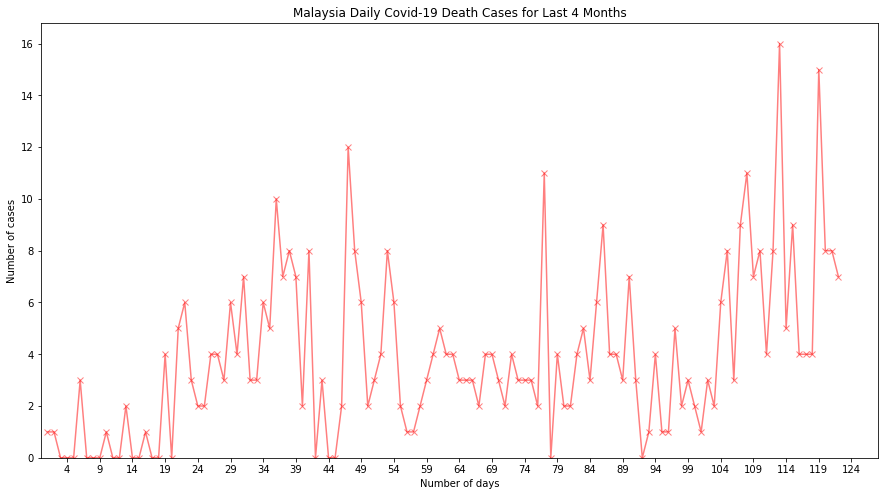

In [827]:
#last 4 months Covid-19 daily death cases 

#initialize x-axis and y-axis
yaxis22 = filter_malay.iloc[:, 5]
xaxis22 = filter_malay.iloc[:, 1]

fig, ax = plotss.subplots(figsize=(15,8))
plotss.plot(xaxis22, yaxis22, marker='x', alpha=0.5,  color='red')
#plotss.legend(['Confirmed Cases', 'Death Cases'], loc='upper left')
#plotss.rcParams['figure.figsize']=(30, 10)
plotss.title('Malaysia Daily Covid-19 Death Cases for Last 4 Months')
plotss.xlabel('Number of days')
plotss.ylabel('Number of cases')
#fig, ax = plotss.subplots(figsize=(20,10))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))
#plotss.xticks(rotation=45)
ax.set_ylim(bottom=0)
ax.set_xlim(0)
plotss.show()

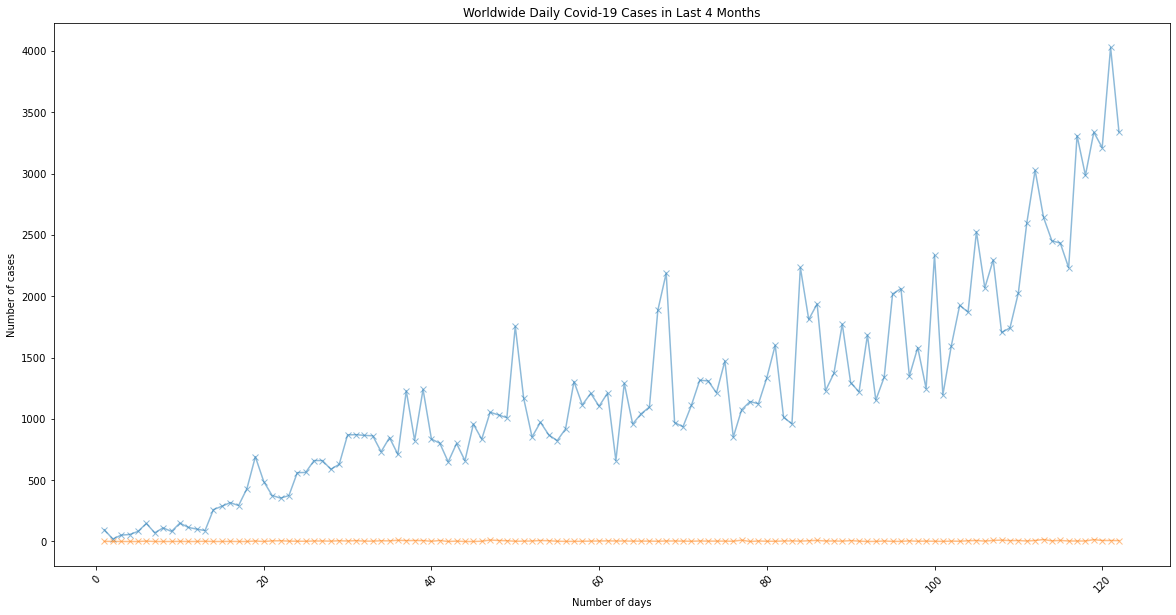

In [828]:
#last 4 months Malaysia Covid-19 cases

#initialize x-axis and y-axis
yaxis3 = filter_malay.iloc[:, 4:]
xaxis3 = filter_malay.iloc[:, 1]

fig, ax = plotss.subplots(figsize=(20,10))
plotss.plot(xaxis3, yaxis3, marker='x',  alpha=0.5)
#plotss.legend(['Confirmed Cases', 'Death Cases'], loc='upper left')
#plotss.rcParams['figure.figsize']=(30, 10)
plotss.title('Worldwide Daily Covid-19 Cases in Last 4 Months')
plotss.xlabel('Number of days')
plotss.ylabel('Number of cases')
#fig, ax = plotss.subplots(figsize=(20,10))
#ax.xaxis.setmajor_locator(mdates.DayLocator(interval=5))
plotss.xticks(rotation=45)
plotss.show()


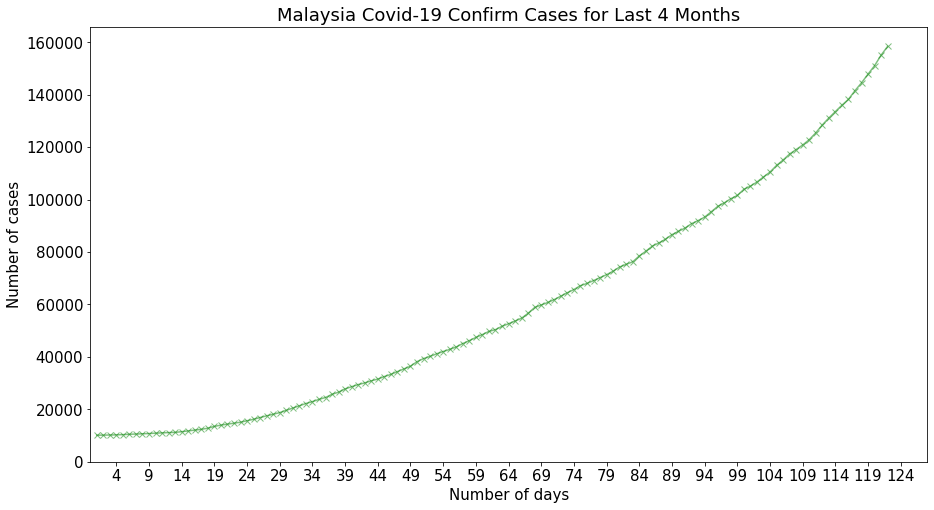

In [1127]:
#last 4 months Covid-19 daily  cases 

#initialize x-axis and y-axis
yaxis22 = filter_malay.iloc[:, 2]
xaxis22 = filter_malay.iloc[:, 1]

fig, ax = plotss.subplots(figsize=(15,8))
plotss.plot(xaxis22, yaxis22, marker='x', alpha=0.5, color='green')
#plotss.legend(['Confirmed Cases', 'Death Cases'], loc='upper left')
#plotss.rcParams['figure.figsize']=(30, 10)
plotss.title('Malaysia Covid-19 Confirm Cases for Last 4 Months')
plotss.xlabel('Number of days')
plotss.ylabel('Number of cases')
#fig, ax = plotss.subplots(figsize=(20,10))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))
#plotss.xticks(rotation=45)
ax.set_ylim(bottom=0)
ax.set_xlim(0)
plotss.show()

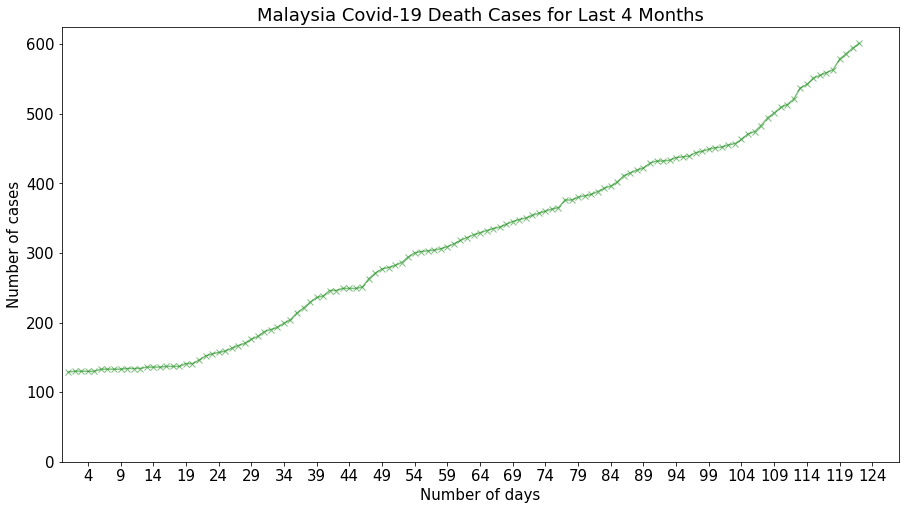

In [1126]:
#last 4 months Covid-19 daily  cases 

#initialize x-axis and y-axis
yaxis22 = filter_malay.iloc[:, 3]
xaxis22 = filter_malay.iloc[:, 1]

fig, ax = plotss.subplots(figsize=(15,8))
plotss.plot(xaxis22, yaxis22, marker='x', alpha=0.5, color='green')
#plotss.legend(['Confirmed Cases', 'Death Cases'], loc='upper left')
#plotss.rcParams['figure.figsize']=(30, 10)
plotss.title('Malaysia Covid-19 Death Cases for Last 4 Months')
plotss.xlabel('Number of days')
plotss.ylabel('Number of cases')
#fig, ax = plotss.subplots(figsize=(20,10))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))
#plotss.xticks(rotation=45)
ax.set_ylim(bottom=0)
ax.set_xlim(0)
plotss.show()

# Data Modeling 

## Linear Regression

## train_test_split() - daily cases

### Worldwide

In [874]:
#confirm cases
y1 = filter_total.iloc[:, 4]
x1 = filter_total.iloc[:, 1]

x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size = 0.2, random_state=42)

#### Making Prediction for Daily Confirm Cases

In [875]:
#linear regression
linr = LinearRegression()
regs1 = linr.fit(x1_train.values.reshape(-1,1), y1_train)

y1_predict = regs1.predict(x1_test.values.reshape(-1,1))
#print(np.concatenate((y_predict.reshape(len(y_predict),1),y_test.reshape(len(y_test),1)),1))
df1 = panda.DataFrame({'Actual no. of confirm cases': y1_test, 'Prediction no. of confirm cases': y1_predict})
df1

,Actual no. of confirm cases,Prediction no. of confirm cases
258,326187.0,373482.077418
285,561712.0,473507.051060
287,511097.0,480916.308367
329,734340.0,636510.711810
244,284210.0,321617.276270
280,511364.0,454983.907793
302,652208.0,536485.738168
347,534592.0,703194.027571
271,386954.0,421642.249912
295,648261.0,510553.337594


In [973]:
#retrieve interception , coefficient

print('Interception : ',  regs1.intercept_)
print('Coefficient : ',  regs1.coef_)
print('Accuracy : ', regs1.score(x1_test.values.reshape(-1,1), y1_test))

wdc_acc = [regs1.score(x1_test.values.reshape(-1,1), y1_test)]

Interception :  303094.13300313184
Coefficient :  [3704.62865341]
Accuracy :  0.6768577052318046


Number of cases = 303094 + 3704 * (no. of days) 
                            = 303094 + 3704 * (25)
                            = 395694 cases (predict -> 395709)

#### Evaluate algorithm

In [877]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y1_test, y1_predict))
print('Mean Squared Error:', metrics.mean_squared_error(y1_test, y1_predict))
print('Root Mean Squared Error:', nampi.sqrt(metrics.mean_squared_error(y1_test, y1_predict)))

Mean Absolute Error: 76247.03259258551
Mean Squared Error: 8364258571.650499
Root Mean Squared Error: 91456.3205669816


 #### Plot graph

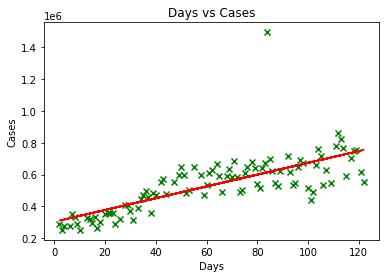

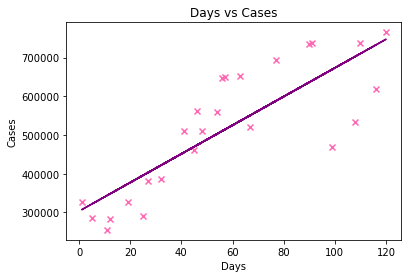

In [878]:
#prediction graph

plotss.scatter(x1_train, y1_train, marker='x', color='green')
plotss.plot(x1_train, regs1.predict(x1_train.values.reshape(-1,1)), color='red')
plotss.title('Days vs Cases')
plotss.xlabel('Days')
plotss.ylabel('Cases')
plotss.show()

plotss.scatter(x1_test, y1_test, marker='x', color='hotpink')
plotss.plot(x1_test, regs1.predict(x1_test.values.reshape(-1,1)), color='purple')
plotss.title('Days vs Cases')
plotss.xlabel('Days')
plotss.ylabel('Cases')
plotss.show()


In [884]:
#death cases
y11 = filter_total.iloc[:, 5]
x11 = filter_total.iloc[:, 1]

x11_train, x11_test, y11_train, y11_test = train_test_split(x11, y11, test_size = 0.2, random_state=42)

#### Making Prediction for Daily Death Cases

In [885]:
#linear regression
linr = LinearRegression()
regs11 = linr.fit(x11_train.values.reshape(-1,1), y11_train)

y11_predict = regs11.predict(x11_test.values.reshape(-1,1))
#print(np.concatenate((y_predict.reshape(len(y_predict),1),y_test.reshape(len(y_test),1)),1))
df11 = panda.DataFrame({'Actual no. of death cases': y11_test, 'Prediction no. of death cases': y11_predict})
df11

,Actual no. of death cases,Prediction no. of death cases
258,5787.0,5651.851286
285,6074.0,7696.129701
287,10185.0,7847.557732
329,13549.0,11027.546379
244,5961.0,4591.855070
280,7137.0,7317.559624
302,10953.0,8983.267963
347,7310.0,12390.398656
271,4803.0,6636.133486
295,9740.0,8453.269855


In [978]:
#retrieve interception , coefficient

print('Interception : ',  regs11.intercept_)
print('Coefficient : ',  regs11.coef_)
print('Accuracy : ', regs11.score(x11_test.values.reshape(-1,1), y11_test))

wdd_acc = [regs11.score(x11_test.values.reshape(-1,1), y11_test)]

Interception :  4213.284993004953
Coefficient :  [75.7140154]
Accuracy :  0.6009174913609364


Number of cases = 4213 + 75 * (no. of days) 
                            = 4213 + 75 * (25)
                            = 6088 cases (predict -> 6106)

#### Evaluate algorithm

In [887]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y11_test, y11_predict))
print('Mean Squared Error:', metrics.mean_squared_error(y11_test, y11_predict))
print('Root Mean Squared Error:', nampi.sqrt(metrics.mean_squared_error(y11_test, y11_predict)))

Mean Absolute Error: 1829.4135262630152
Mean Squared Error: 4504537.362760214
Root Mean Squared Error: 2122.38954076772


#### Plot graph

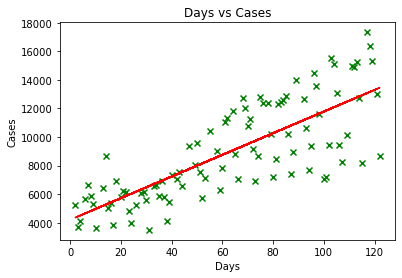

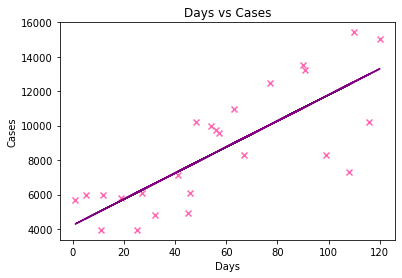

In [888]:
#prediction graph

plotss.scatter(x11_train, y11_train, marker='x', color='green')
plotss.plot(x11_train, regs11.predict(x11_train.values.reshape(-1,1)), color='red')
plotss.title('Days vs Cases')
plotss.xlabel('Days')
plotss.ylabel('Cases')
plotss.show()

plotss.scatter(x11_test, y11_test, marker='x', color='hotpink')
plotss.plot(x11_test, regs11.predict(x11_test.values.reshape(-1,1)), color='purple')
plotss.title('Days vs Cases')
plotss.xlabel('Days')
plotss.ylabel('Cases')
plotss.show()


### Malaysia

In [983]:
#confirm cases
y2 = filter_malay.iloc[:, 4]
x2 = filter_malay.iloc[:, 1]

x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size = 0.2, random_state=42)

#### Making Prediction for Daily Confirm Cases

In [984]:
#linear regression
linr = LinearRegression()
regs2 = linr.fit(x2_train.values.reshape(-1,1), y2_train)

y2_predict = regs2.predict(x2_test.values.reshape(-1,1))
#print(np.concatenate((y_predict.reshape(len(y_predict),1),y_test.reshape(len(y_test),1)),1))
df2 = panda.DataFrame({'Actual no. of confirm cases': y2_test, 'Prediction no. of confirm cases': y2_predict})
df2

,Actual no. of confirm cases,Prediction no. of confirm cases
258,691.0,317.004241
285,834.0,893.680867
287,1032.0,936.397654
329,1295.0,1833.450183
244,82.0,17.986731
280,801.0,786.888899
302,1290.0,1256.773557
347,1704.0,2217.901266
271,865.0,594.663357
295,919.0,1107.264802


In [985]:
#retrieve interception , coefficient

print('Interception : ',  regs2.intercept_)
print('Coefficient : ',  regs2.coef_)
print('Accuracy : ', regs2.score(x2_test.values.reshape(-1,1), y2_test))

mdc_acc = [regs2.score(x2_test.values.reshape(-1,1), y2_test)]

Interception :  -88.80523631681444
Coefficient :  [21.35839354]
Accuracy :  0.7539316194336267


Number of cases = -88 + 21 * (no. of days) 
                            = -88 + 21 * (25)
                            = 437 cases (predict -> 445)

#### Evaluate algorithm

In [892]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y2_test, y2_predict))
print('Mean Squared Error:', metrics.mean_squared_error(y2_test, y2_predict))
print('Root Mean Squared Error:', nampi.sqrt(metrics.mean_squared_error(y2_test, y2_predict)))

Mean Absolute Error: 268.8196468044656
Mean Squared Error: 125121.14385760849
Root Mean Squared Error: 353.72467239027657


#### Plot graph

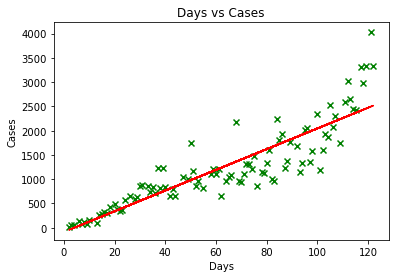

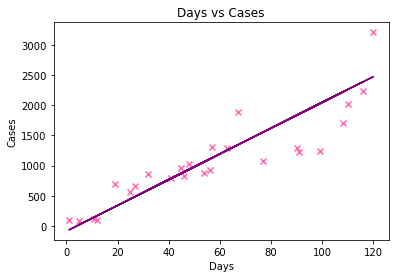

In [895]:
#prediction graph

plotss.scatter(x2_train, y2_train, marker='x', color='green')
plotss.plot(x2_train, regs2.predict(x2_train.values.reshape(-1,1)), color='red')
plotss.title('Days vs Cases')
plotss.xlabel('Days')
plotss.ylabel('Cases')
plotss.show()

plotss.scatter(x2_test, y2_test, marker='x', color='hotpink')
plotss.plot(x2_test, regs2.predict(x2_test.values.reshape(-1,1)), color='purple')
plotss.title('Days vs Cases')
plotss.xlabel('Days')
plotss.ylabel('Cases')
plotss.show()


In [993]:
#death cases
y22 = filter_malay.iloc[:, 5]
x22 = filter_malay.iloc[:, 1]

x22_train, x22_test, y22_train, y22_test = train_test_split(x22, y22, test_size = 0.2, random_state=42)

#### Making Prediction for Daily Death Cases

In [994]:
#linear regression
linr = LinearRegression()
regs22 = linr.fit(x22_train.values.reshape(-1,1), y22_train)

y22_predict = regs22.predict(x22_test.values.reshape(-1,1))
#print(np.concatenate((y_predict.reshape(len(y_predict),1),y_test.reshape(len(y_test),1)),1))
df22 = panda.DataFrame({'Actual no. of confirm cases': y22_test, 'Prediction no. of confirm cases': y22_predict})
df22

,Actual no. of confirm cases,Prediction no. of confirm cases
258,4.0,2.340722
285,2.0,3.263753
287,8.0,3.332125
329,7.0,4.767950
244,0.0,1.862114
280,8.0,3.092821
302,4.0,3.844920
347,11.0,5.383303
271,3.0,2.785144
295,1.0,3.605616


In [995]:
#retrieve interception , coefficient

print('Interception : ',  regs22.intercept_)
print('Coefficient : ',  regs22.coef_)
print('Accuracy : ', regs22.score(x22_test.values.reshape(-1,1), y22_test))

mdd_acc = [regs22.score(x22_test.values.reshape(-1,1), y22_test)]

Interception :  1.691182730360727
Coefficient :  [0.0341863]
Accuracy :  0.2805406360163739


Number of cases = 1.6 + 0.034 * (no. of days) 
                            = 1.6 + 0.034 * (25)
                            = 2.45 cases (predict -> 2.54)

#### Evaluate algorithm

In [931]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y22_test, y22_predict))
print('Mean Squared Error:', metrics.mean_squared_error(y22_test, y22_predict))
print('Root Mean Squared Error:', nampi.sqrt(metrics.mean_squared_error(y22_test, y22_predict)))

Mean Absolute Error: 2.3715898804819515
Mean Squared Error: 8.085572116193584
Root Mean Squared Error: 2.8435140436075894


#### Plot graph

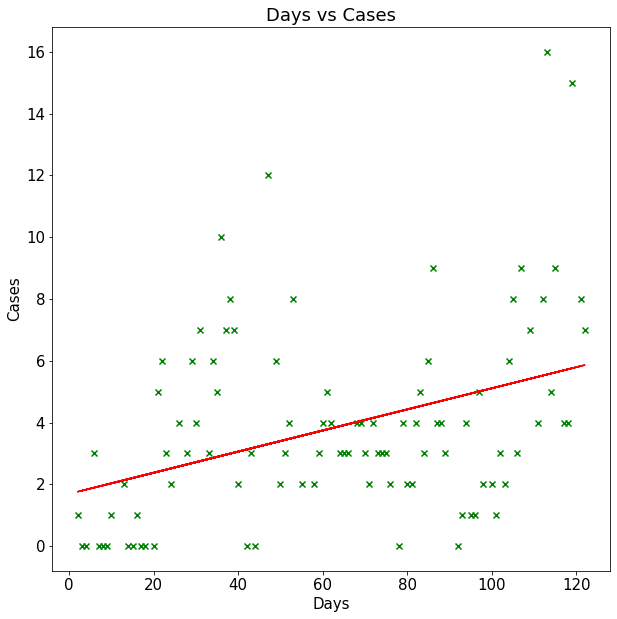

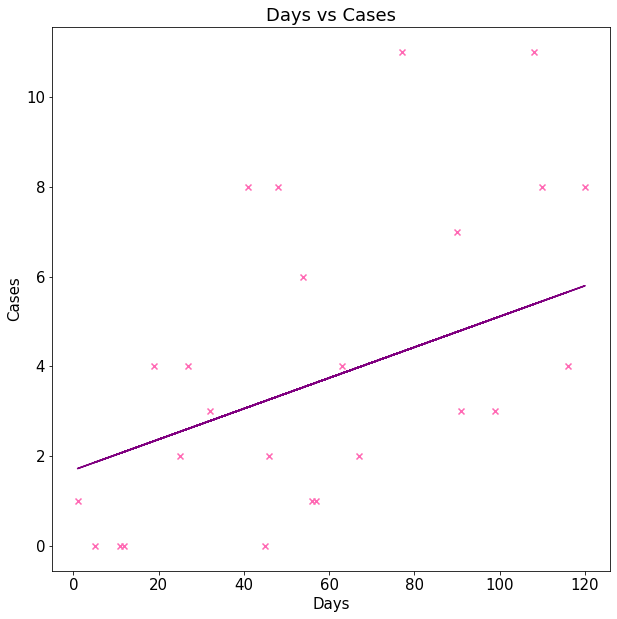

In [932]:
#prediction graph

plotss.scatter(x22_train, y22_train, marker='x', color='green')
plotss.plot(x22_train, regs22.predict(x22_train.values.reshape(-1,1)), color='red')
plotss.title('Days vs Cases')
plotss.xlabel('Days')
plotss.ylabel('Cases')
plotss.show()

plotss.scatter(x22_test, y22_test, marker='x', color='hotpink')
plotss.plot(x22_test, regs22.predict(x22_test.values.reshape(-1,1)), color='purple')
plotss.title('Days vs Cases')
plotss.xlabel('Days')
plotss.ylabel('Cases')
plotss.show()


## Polynomial Regression

## degree of polynomial - daily cases

### Worldwide

In [937]:
#confirm cases
y3 = filter_total.iloc[:, 4]
x3 = filter_total.iloc[:, 1]

In [974]:
poly_reg = PolynomialFeatures(degree=4)
x3_poly = poly_reg.fit_transform(x3.values.reshape(-1,1))
pol3=linr.fit(x3_poly, y3)
print('Accuracy:', pol3.score(x3_poly, y3))
print('Coefficient', pol3.coef_)
print('Intercept', pol3.intercept_)

print('Mean Absolute Error:', metrics.mean_absolute_error(x3.values.reshape(-1,1), linr.predict(x3_poly)))
print('Mean Squared Error:', metrics.mean_squared_error(x3.values.reshape(-1,1), linr.predict(x3_poly)))
print('Root Mean Squared Error:', nampi.sqrt(metrics.mean_squared_error(x3.values.reshape(-1,1), linr.predict(x3_poly))))

wdc_acc.append(pol33.score(x3_poly, y3))

Accuracy: 0.6315815168989178
Coefficient [ 0.00000000e+00 -5.28315952e+03  4.27600943e+02 -5.63792745e+00
  2.22684243e-02]
Intercept 303274.1290952172
Mean Absolute Error: 531358.5327868848
Mean Squared Error: 301526897645.0477
Root Mean Squared Error: 549114.6489077192


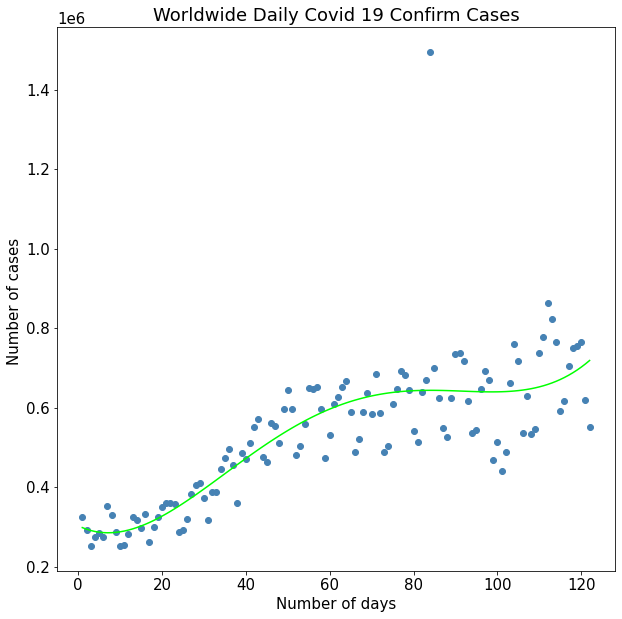

In [922]:
# Visualizing the Polymonial Regression results
def viz_polymonial():
    plotss.scatter(x3, y3, color='steelblue')
    plotss.rcParams.update({'font.size': 15})
    plotss.plot(x3.values.reshape(-1,1), linr.predict(x3_poly), color='lime')
    plotss.rcParams['figure.figsize']=(10, 10)
    plotss.title('Worldwide Daily Covid 19 Confirm Cases')
    plotss.xlabel('Number of days')
    plotss.ylabel('Number of cases ')
    plotss.show()
    return
viz_polymonial()

In [987]:
#death cases
y33 = filter_total.iloc[:, 5]
x33 = filter_total.iloc[:, 1]

In [988]:
poly_reg = PolynomialFeatures(degree=4)
x33_poly = poly_reg.fit_transform(x33.values.reshape(-1,1))
pol33=linr.fit(x33_poly, y33)
print('Accuracy:', pol33.score(x33_poly, y33))
print('Coefficient', pol33.coef_)
print('Intercept', pol33.intercept_)

print('Mean Absolute Error:', metrics.mean_absolute_error(x33.values.reshape(-1,1), linr.predict(x33_poly)))
print('Mean Squared Error:', metrics.mean_squared_error(x33.values.reshape(-1,1), linr.predict(x33_poly)))
print('Root Mean Squared Error:', nampi.sqrt(metrics.mean_squared_error(x33.values.reshape(-1,1), linr.predict(x33_poly))))

wdd_acc.append(pol33.score(x33_poly, y33))

Accuracy: 0.6277400034989764
Coefficient [ 0.00000000e+00 -2.00642523e+02  8.88470989e+00 -1.01251453e-01
  3.76986875e-04]
Intercept 6274.23741372211
Mean Absolute Error: 8822.950819672127
Mean Squared Error: 84892175.62316488
Root Mean Squared Error: 9213.695003806284


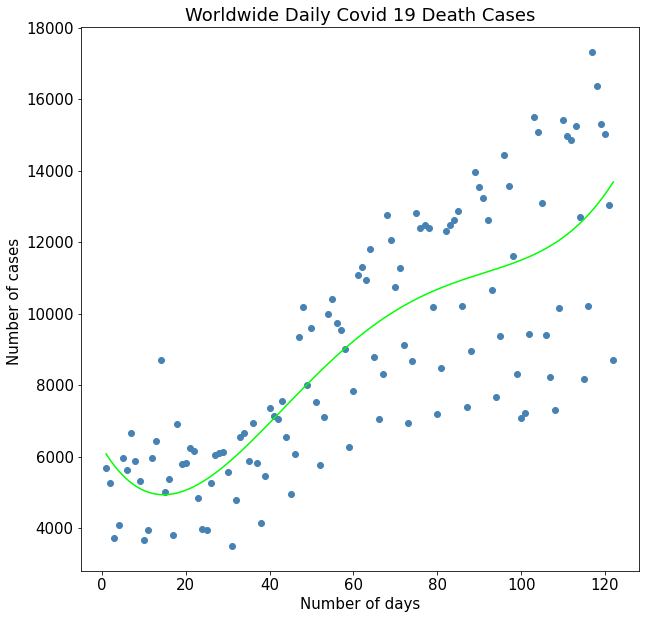

In [989]:
# Visualizing the Polymonial Regression results
def viz_polymonial():
    plotss.scatter(x33, y33, color='steelblue')
    plotss.rcParams.update({'font.size': 15})
    plotss.plot(x33.values.reshape(-1,1), linr.predict(x33_poly), color='lime')
    plotss.rcParams['figure.figsize']=(10, 10)
    plotss.title('Worldwide Daily Covid 19 Death Cases')
    plotss.xlabel('Number of days')
    plotss.ylabel('Number of cases ')
    plotss.show()
    return
viz_polymonial()

### Malaysia

In [990]:
#confirm cases
y4 = filter_malay.iloc[:, 4]
x4 = filter_malay.iloc[:, 1]

In [991]:
poly_reg = PolynomialFeatures(degree=4)
x4_poly = poly_reg.fit_transform(x4.values.reshape(-1,1))
pol4=linr.fit(x4_poly, y4)
print('Accuracy:', pol4.score(x4_poly, y4))
print('Coefficient', pol4.coef_)
print('Intercept', pol4.intercept_)

print('Mean Absolute Error:', metrics.mean_absolute_error(x4.values.reshape(-1,1), linr.predict(x4_poly)))
print('Mean Squared Error:', metrics.mean_squared_error(x4.values.reshape(-1,1), linr.predict(x4_poly)))
print('Root Mean Squared Error:', nampi.sqrt(metrics.mean_squared_error(x4.values.reshape(-1,1), linr.predict(x4_poly))))

mdc_acc.append(pol4.score(x4_poly, y4))

Accuracy: 0.8815701065402324
Coefficient [ 0.00000000e+00  1.03294468e+01  8.25991628e-01 -1.68082772e-02
  9.25509848e-05]
Intercept 3.2446141767115932
Mean Absolute Error: 1154.7459016393436
Mean Squared Error: 1880063.0165123057
Root Mean Squared Error: 1371.1538996452243


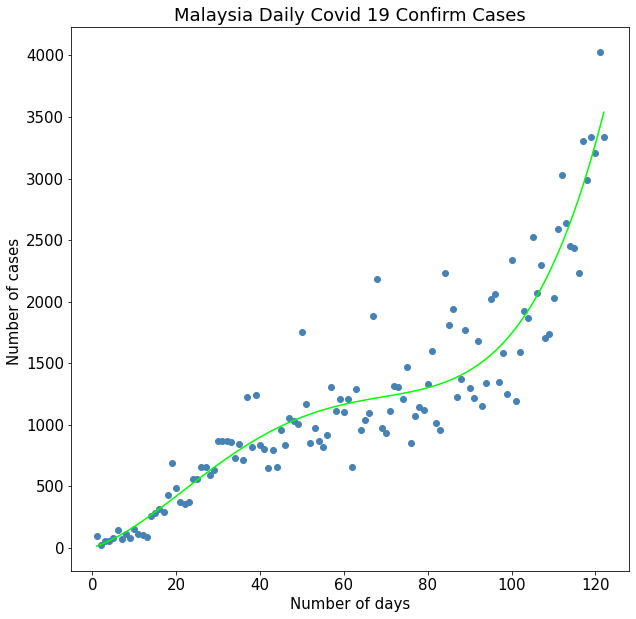

In [992]:
# Visualizing the Polymonial Regression results
def viz_polymonial():
    plotss.scatter(x4, y4, color='steelblue')
    plotss.rcParams.update({'font.size': 15})
    plotss.plot(x4.values.reshape(-1,1), linr.predict(x4_poly), color='lime')
    plotss.rcParams['figure.figsize']=(10, 10)
    plotss.title('Malaysia Daily Covid 19 Confirm Cases')
    plotss.xlabel('Number of days')
    plotss.ylabel('Number of cases ')
    plotss.show()
    return
viz_polymonial()

In [996]:
#death cases
y44 = filter_malay.iloc[:, 5]
x44 = filter_malay.iloc[:, 1]

In [1011]:
poly_reg = PolynomialFeatures(degree=4)
x44_poly = poly_reg.fit_transform(x44.values.reshape(-1,1))
pol44=linr.fit(x44_poly, y44)
print('Accuracy:', pol44.score(x44_poly, y44))
print('Coefficient', pol44.coef_)
print('Intercept', pol44.intercept_)

print('Mean Absolute Error:', metrics.mean_absolute_error(x44.values.reshape(-1,1), linr.predict(x44_poly)))
print('Mean Squared Error:', metrics.mean_squared_error(x44.values.reshape(-1,1), linr.predict(x44_poly)))
print('Root Mean Squared Error:', nampi.sqrt(metrics.mean_squared_error(x44.values.reshape(-1,1), linr.predict(x44_poly))))

mdd_acc.append(pol44.score(x44_poly, y44))

Accuracy: 0.32103305851000474
Coefficient [ 0.00000000e+00  2.96934040e-01 -4.55589543e-03  1.23767754e-05
  9.03321471e-08]
Intercept -1.2982620695735325
Mean Absolute Error: 57.62295081967214
Mean Squared Error: 4468.951524168952
Root Mean Squared Error: 66.85021708393289


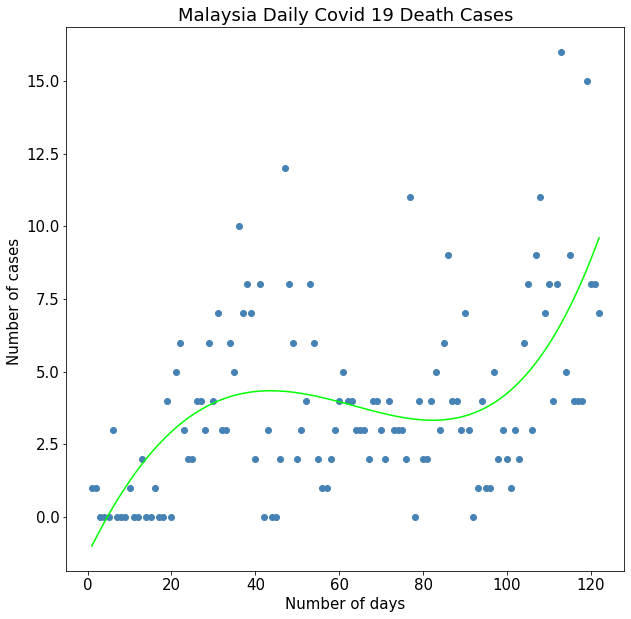

In [998]:
# Visualizing the Polymonial Regression results
def viz_polymonial():
    plotss.scatter(x44, y44, color='steelblue')
    plotss.rcParams.update({'font.size': 15})
    plotss.plot(x44.values.reshape(-1,1), linr.predict(x44_poly), color='lime')
    plotss.rcParams['figure.figsize']=(10, 10)
    plotss.title('Malaysia Daily Covid 19 Death Cases')
    plotss.xlabel('Number of days')
    plotss.ylabel('Number of cases ')
    plotss.show()
    return
viz_polymonial()

# Conclusion

In [1012]:
mdd_acc


[0.2805406360163739, 0.32103305851000474]

In [1013]:
mod_acc = panda.DataFrame({'Model': ['Linear Regression','Polynomial Regression'],
                       'Worldwide Confirm Cases': wdc_acc, 'Worldwide Death Cases': wdd_acc, 'Malaysia Confirm Cases': mdc_acc, 'Malaysia Death Cases': mdd_acc })
#, 'Neural network using split', 'Neural network using cross validation'
mod_acc

,Model,Worldwide Confirm Cases,Worldwide Death Cases,Malaysia Confirm Cases,Malaysia Death Cases
0,Linear Regression,0.676858,0.600917,0.753932,0.280541
1,Polynomial Regression,0.631582,0.627740,0.881570,0.321033


<AxesSubplot:xlabel='Accuracy', ylabel='Cases'>

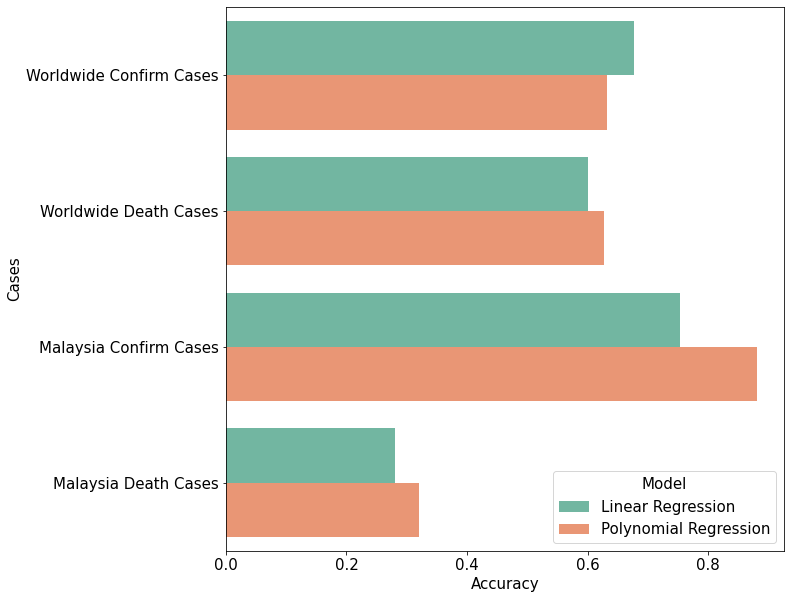

In [1077]:
dfs1 = panda.melt(mod_acc, id_vars = "Model")

dfs1 = dfs1.rename(columns = {'value': 'Accuracy'}, inplace = False)
dfs1 = dfs1.rename(columns = {'variable': 'Cases'}, inplace = False)

snss.set_palette("Set2")
snss.barplot(x="Accuracy", y="Cases", hue="Model", data=dfs1)